In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import csv
import datetime as dt
import json

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
steam_2016 = pd.read_csv('C:/Users/Barbie/Desktop/DA11/Capstone/STEAM/COOKED_STEAM_DATA/games_features_CLEANED.csv')

In [4]:
steam_2016 = steam_2016.drop(columns = ['QueryName'])
steam_2016 = steam_2016.rename(columns = {'ResponseName' : 'Name', 'PriceInitial': 'PriceInitial_2016',
                                         'PriceFinal' : 'PriceFinal_2016'})
steam_2016 = steam_2016.dropna(subset = ['Name'])

In [5]:
steam_2016.head(3)

,QueryID,ResponseID,Name,ReleaseDate,ReleaseYear,ReleaseMonth,RequiredAge,DLCCount,Metacritic,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,AchievementCount,ControllerSupport,IsFree,SubscriptionAvail,PlatformWindows,PlatformLinux,PlatformMac,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryVRSupport,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceCurrency,PriceInitial_2016,PriceFinal_2016,AboutText,DetailedDescrip,SupportedLanguages
0,10.0,10.0,Counter-Strike,2000-11-01,2000,November,0,0,88,68991,13,13033334,9140731,0,False,False,False,True,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,9.99,9.99,Play the worlds number 1 online action game. E...,Play the worlds number 1 online action game. E...,English French German Italian Spanish Simplifi...
1,20.0,20.0,Team Fortress Classic,1999-04-01,1999,April,0,0,0,2439,5,5399140,753627,0,False,False,False,True,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,One of the most popular online action games of...,One of the most popular online action games of...,English French German Italian Spanish
2,30.0,30.0,Day of Defeat,2003-05-01,2003,May,0,0,79,2319,5,7621102,1709740,0,False,False,False,True,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,USD,4.99,4.99,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,English French German Italian Spanish


In [6]:
# checking for duplicates

# steam_2016['Name'].value_counts()  

In [7]:
# gives us the unique years and count of releases each year

# steam_2016.value_counts('ReleaseYear').sort_values().reset_index()  

In [8]:
# gives us the unique months and count of releases each month

# steam_2016.value_counts('ReleaseMonth').reset_index() 

In [9]:
# gives us the unique required ages with how many games were associated

# steam_2016.value_counts('RequiredAge').reset_index() 

In [10]:
#gives us all games with Metacritic ratings

# steam_2016['Metacritic'].reset_index().sort_values('Metacritic', ascending = False) 

## Next I read in a dataset that I wanted to include in my Capstone project alongside my existing one.

## This dataset is composed of multiple Steam API calls. I used a website called SteamSpy who runs data and stats on Steam's platform, updating every 24 hours. I wanted the freshed data from Steam, including all of their games and game info. The API call to retrieve this information would return roughly 1,000 games at once. So in order to obtain ALL of the games on Steam, I did 73 seperated Steam calls to retrieve the data I wanted. I then conslidated them into one giant json file using Notepad ++.

## That file is what I read into Python, as you can see my code below. I have commented it out while I work on my analysis so it doesn't have to read in the json file every time I need to restart my kernel.

In [11]:
# writting in the giant json file
# all_steam_data_MERGED = pd.read_json(r"C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_CALLS_STEAM\COMBINED_TESTING_2.json")

# using this to turn the columns into rows and the rows into columns
# all_steam_data = all_steam_data_MERGED.transpose()       

# renaming all the columns to make it flow better
# all_steam_data = all_steam_data.rename(
#     columns = {'appid' : 'App_Id',
#                'name' : 'Name',
#                'developer' : 'Developer',
#                'publisher' : 'Publisher',
#                'score_rank' : 'Score_Rank',
#                'positive' : 'Postive_Reviews',b
#                'negative' : 'Negative_Reviews',
#                'userscore' : 'Userscore',
#                'owners' : 'Owners',
#                'average_forever' : 'Avg_Playtime_Lifetime',
#                'average_2weeks' : 'Avg_Playtime_Two_Weeks',
#                'median_forever' : 'Median_Playtime_Lifetime',
#                'median_2weeks' : 'Median_Playtime_Two_Weeks',
#                'price' : 'Current_Price',
#                'initialprice' : 'Initial_Price',
#                'discount' : 'Discount',
#                'ccu' : 'Peak_CCU'})

# resetting the index since it seemed to have its own index column identical to the "App_id" column
# all_steam_data = all_steam_data.reset_index()     

# dropped the other index column to have the tradiation index column to run alongside the "App_id" column
# all_steam_data = all_steam_data.drop(columns = ['index'])

## The code below was used to create a csv file with this new data. I have commented this out so it doesn't write a new csv file everytime.

In [12]:
# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\COOKED_STEAM_DATA\all_steam_data.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# all_steam_data.to_csv(filepath)  

# imported it out as a csv to load into Excel
# commented it out so it doesn't create a new csv every time I run the notebook :)

## From now on, I will read in the csv file I created above as the basis for my analysis!

In [13]:
# steam_api = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Project_Data\Capstone\all_steam_data_analysis.csv')

In [14]:
steam_api_filtered = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\steam_api_filtered.csv')

In [15]:
# i = steam_api[((steam_api.Name == 'RETNE'))].index 
# steam_api_filtered = steam_api.drop(i)
# steam_api_filtered

In [16]:
#dropping duplicate game names and 2 irrevelant columns to clean it up a bit more
# steam_api_filtered = steam_api.drop_duplicates(subset = ['Name'], keep = 'last')
# steam_api_filtered = steam_api_filtered.drop(columns = ['Unnamed: 0', 'Current_Price', 'Initial_Price', 'Score_Rank', 'Userscore'])
# steam_api_filtered = steam_api_filtered.rename(columns = {'Current_Price_Fixed' : 'Current_Price_$', 
#                                         'Initial_Priced_Fixed' : 'Initial_Price_$',
#                                         'Discount' : 'Discount_in_%'})


# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Project_Data\Capstone\steam_api_filtered.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# steam_api_filtered.to_csv(filepath)  

In [17]:
# steam_api_filtered.dtypes

## Next I will merge the inital 2016 dataset to my Steam Api dataset.

In [18]:
# steam_merged = steam_2016.merge(steam_API, on = 'Name', how = 'outer')

In [19]:
# steam_merged

In [20]:
# the_steam_data = steam_merged.drop(columns = ['QueryID', 'ResponseID', 'AboutText', 'DetailedDescrip', 
#                                              'App_Id', 'Score_Rank'])

# the_steam_data = the_steam_data.rename(columns = {'Current_Price' : 'Current_Price_2024',
#                                                   'Initial_Price' : 'Initial_Price_2024'})

# the_steam_data.head(3)

##  

# Now... to being my analysis!

##  

In [21]:
steam_api_filtered = steam_api_filtered.drop(columns = ['Unnamed: 0'])
steam_api_filtered = steam_api_filtered.drop(columns = ['Avg_Playtime_Lifetime'])
steam_api_filtered = steam_api_filtered.drop(columns = ['Median_Playtime_Lifetime'])
steam_api_filtered['diff_current_initial_price'] = steam_api_filtered['Initial_Price_$'] - steam_api_filtered['Current_Price_$']
steam_api_filtered['same_dev_pub'] = steam_api_filtered['Developer'] == steam_api_filtered['Publisher']
steam_api_filtered['diff_in_pos_neg_reviews'] = steam_api_filtered['Positive_Reviews'] - steam_api_filtered['Negative_Reviews']
steam_api_filtered = steam_api_filtered.rename(columns = {'Peak_CCU' : 'Peak_Online_Players'})

In [22]:
steam_api_filtered

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True,6001995
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True,399174
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",353,445,39.99,39.99,0.0,7073,0.0,True,111507
4,1623730,Palworld,Pocketpair,Pocketpair,280252,18423,"50,000,000 .. 100,000,000",742,238,29.99,29.99,0.0,22622,0.0,True,261829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,1963990,Deliver Us From Evil (DUFE) - Masquerade,Galen Games,Galen Games,4,2,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True,2
70326,1726330,Game Developer Simulator,Phantom Studio,Phantom Studio,3,7,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,True,-4
70327,740310,Transmogrify,Odyssey Entertainment,Odyssey Entertainment,21,2,"0 .. 20,000",0,0,14.99,14.99,0.0,0,0.0,True,19
70328,1285350,Easy puzzle: Landscape,Laush Dmitriy Sergeevich,Laush Studio,12,2,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,False,10


In [23]:
# steam_api_filtered['Avg_Playtime_Lifetime'].sum()

## Total average playtime since March 2009 on steam is 16,402,282 minutes! 
## That's 273,371 hours, 11,390 days, about 380 months, and 31.6 YEARS!

In [24]:
# top 10 Developers (create the game itself with programming, art and design)
steam_api_filtered.value_counts('Developer').head(10).reset_index()

,Developer,count
0,Choice of Games,158
1,Creobit,135
2,Laush Dmitriy Sergeevich,116
3,"KOEI TECMO GAMES CO., LTD.",100
4,Hosted Games,99
5,Sokpop Collective,99
6,Boogygames Studios,98
7,Elephant Games,79
8,Dnovel,70
9,Blender Games,69


In [25]:
# top 10 Publishers (responsible for marketing, distributing, financing, etc)
steam_api_filtered.value_counts('Publisher').head(10).reset_index()

,Publisher,count
0,Big Fish Games,489
1,8floor,259
2,Conglomerate 5,199
3,SEGA,187
4,HH-Games,183
5,Choice of Games,158
6,Strategy First,157
7,Sekai Project,151
8,Ubisoft,140
9,THQ Nordic,134


In [26]:
total_owners = steam_api_filtered.value_counts('Owners').reset_index()
total_owners

,Owners,count
0,"0 .. 20,000",48137
1,"20,000 .. 50,000",9417
2,"50,000 .. 100,000",4705
3,"100,000 .. 200,000",3105
4,"200,000 .. 500,000",2597
5,"500,000 .. 1,000,000",1117
6,"1,000,000 .. 2,000,000",655
7,"2,000,000 .. 5,000,000",391
8,"5,000,000 .. 10,000,000",125
9,"10,000,000 .. 20,000,000",45


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '0 .. 20,000'),
  Text(1, 0, '20,000 .. 50,000'),
  Text(2, 0, '50,000 .. 100,000'),
  Text(3, 0, '100,000 .. 200,000'),
  Text(4, 0, '200,000 .. 500,000'),
  Text(5, 0, '500,000 .. 1,000,000'),
  Text(6, 0, '1,000,000 .. 2,000,000'),
  Text(7, 0, '2,000,000 .. 5,000,000'),
  Text(8, 0, '5,000,000 .. 10,000,000'),
  Text(9, 0, '10,000,000 .. 20,000,000'),
  Text(10, 0, '20,000,000 .. 50,000,000'),
  Text(11, 0, '50,000,000 .. 100,000,000'),
  Text(12, 0, '100,000,000 .. 200,000,000')])

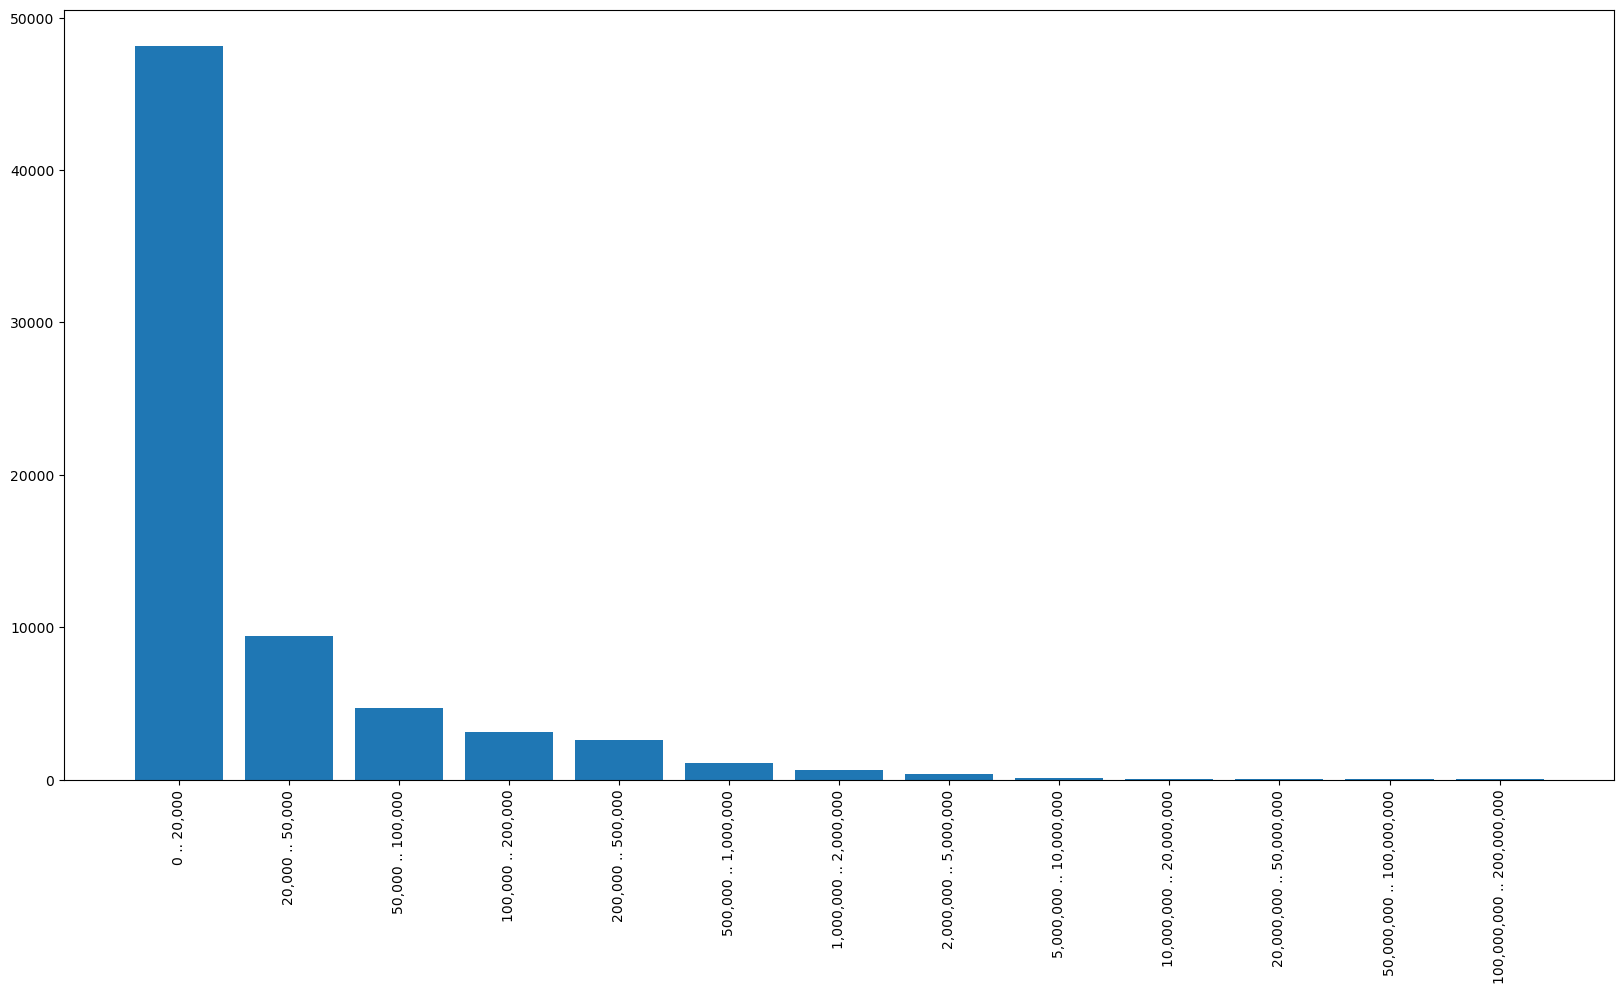

In [27]:
plt.figure(figsize = (20, 10))
plt.bar(total_owners['Owners'], total_owners['count'])
plt.xticks(rotation = 90)

In [28]:
owners1 = steam_api_filtered[steam_api_filtered['Owners'] == '0 .. 20,000'].sort_values('Positive_Reviews', ascending = False)
owners2 = steam_api_filtered[steam_api_filtered['Owners'] == '20,000 .. 50,000'].sort_values('Positive_Reviews', ascending = False)
owners3 = steam_api_filtered[steam_api_filtered['Owners'] == '50,000 .. 100,000'].sort_values('Positive_Reviews', ascending = False)
owners4 = steam_api_filtered[steam_api_filtered['Owners'] == '100,000 .. 200,000'].sort_values('Positive_Reviews', ascending = False)
owners5 = steam_api_filtered[steam_api_filtered['Owners'] == '200,000 .. 500,000'].sort_values('Positive_Reviews', ascending = False)
owners6 = steam_api_filtered[steam_api_filtered['Owners'] == '500,000 .. 1,000,000'].sort_values('Positive_Reviews', ascending = False)
owners7 = steam_api_filtered[steam_api_filtered['Owners'] == '1,000,000 .. 2,000,000'].sort_values('Positive_Reviews', ascending = False)
owners8 = steam_api_filtered[steam_api_filtered['Owners'] == '2,000,000 .. 5,000,000'].sort_values('Positive_Reviews', ascending = False)
owners9 = steam_api_filtered[steam_api_filtered['Owners'] == '5,000,000 .. 10,000,000'].sort_values('Positive_Reviews', ascending = False)
owners10 = steam_api_filtered[steam_api_filtered['Owners'] == '10,000,000 .. 20,000,000'].sort_values('Positive_Reviews', ascending = False)
owners11 = steam_api_filtered[steam_api_filtered['Owners'] == '20,000,000 .. 50,000,000'].sort_values('Positive_Reviews', ascending = False)
owners12 = steam_api_filtered[steam_api_filtered['Owners'] == '50,000,000 .. 100,000,000'].sort_values('Positive_Reviews', ascending = False)
owners13 = steam_api_filtered[steam_api_filtered['Owners'] == '100,000,000 .. 200,000,000'].sort_values('Positive_Reviews', ascending = False)

In [29]:
owners1

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
59627,1321440,Cassette Beasts,Bytten Studio,Raw Fury,6424,246,"0 .. 20,000",0,0,13.99,19.99,30.0,590,6.00,False,6178
59626,1658150,Moonstone Island,Studio Supersoft,Raw Fury,2311,355,"0 .. 20,000",0,0,13.99,19.99,30.0,383,6.00,False,1956
59625,1245430,Golden Light,Mr. Pink,HypeTrain Digital,2147,251,"0 .. 20,000",0,0,19.99,19.99,0.0,4,0.00,False,1896
59770,211260,They Bleed Pixels,Spooky Squid Games Inc.,Spooky Squid Games Inc.,2088,422,"0 .. 20,000",0,0,9.99,9.99,0.0,3,0.00,True,1666
59624,1658040,I Am Future: Cozy Apocalypse Survival,Mandragora,tinyBuild,2026,246,"0 .. 20,000",0,0,9.74,14.99,35.0,416,5.25,False,1780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61396,2778360,IDLE AnimalÂ Anatomy,AA2G1,AA2G1,0,1,"0 .. 20,000",0,0,11.99,11.99,0.0,0,0.00,True,-1
61395,2772920,EPIC ROGUE,Archor Wright,Archor Games,0,5,"0 .. 20,000",0,0,0.99,0.99,0.0,0,0.00,False,-5
61394,2623090,Battle Simulator: Counter Stickman,Yurii Nikshych,Angels Vs Demons,0,3,"0 .. 20,000",0,0,2.99,2.99,0.0,0,0.00,False,-3
67503,1386560,Fancy Skiing â…¢ Pro,å“ˆè§†å¥‡ç§‘æŠ€,Hash Technology,0,3,"0 .. 20,000",0,0,11.99,11.99,0.0,0,0.00,False,-3


In [30]:
# owners1['diff_in_pos_neg_reviews']

In [31]:
list_of_owner_buckets = steam_api_filtered['Owners'].unique().tolist()
list_of_owner_buckets

['100,000,000 .. 200,000,000',
 '50,000,000 .. 100,000,000',
 '20,000,000 .. 50,000,000',
 '10,000,000 .. 20,000,000',
 '5,000,000 .. 10,000,000',
 '2,000,000 .. 5,000,000',
 '1,000,000 .. 2,000,000',
 '500,000 .. 1,000,000',
 '200,000 .. 500,000',
 '100,000 .. 200,000',
 '50,000 .. 100,000',
 '20,000 .. 50,000',
 '0 .. 20,000']

In [32]:
for owner_bucket in [list_of_owner_buckets]:
    print(owner_bucket)

['100,000,000 .. 200,000,000', '50,000,000 .. 100,000,000', '20,000,000 .. 50,000,000', '10,000,000 .. 20,000,000', '5,000,000 .. 10,000,000', '2,000,000 .. 5,000,000', '1,000,000 .. 2,000,000', '500,000 .. 1,000,000', '200,000 .. 500,000', '100,000 .. 200,000', '50,000 .. 100,000', '20,000 .. 50,000', '0 .. 20,000']


In [33]:
def test(Owners):
    owners = steam_api_filtered[steam_api_filtered['Owners'] == Owners]
    return owners['Positive_Reviews'].sum()

In [34]:
steam_api_filtered[steam_api_filtered['Owners'] == '2,000,000 .. 5,000,000'].sort_values('Positive_Reviews', ascending = False)['Positive_Reviews'].sum()

19289284

In [35]:
test('0 .. 20,000')

1502988

In [36]:
def total_positive_reviews(Owners):
    owners = steam_api_filtered[steam_api_filtered['Owners'] == Owners]
    
#     for Owners in list_of_owner_buckets:
#         return total_positive_reviews
    
    if Owners == '0 .. 20,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '20,000 .. 50,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '50,000 .. 100,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '100,000 .. 200,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '200,000 .. 500,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '500,000 .. 1,000,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '1,000,000 .. 2,000,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '2,000,000 .. 5,000,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '5,000,000 .. 10,000,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '10,000,000 .. 20,000,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '20,000,000 .. 50,000,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '50,000,000 .. 100,000,000':
        return owners['Positive_Reviews'].sum()
    elif Owners == '100,000,000 .. 200,000,000':
        return owners['Positive_Reviews'].sum()
    else:
        return NONE

In [37]:
print(f"total pos reviews for 0 .. 20,000 is", total_positive_reviews('0 .. 20,000'))
print(f"total pos reviews for 20,000 .. 50,000 is", total_positive_reviews('20,000 .. 50,000'))
print(f"total pos reviews for 50,000 .. 100,000 is", total_positive_reviews('50,000 .. 100,000'))
print(f"total pos reviews for 100,000 .. 200,000 is", total_positive_reviews('100,000 .. 200,000'))
print(f"total pos reviews for 200,000 .. 500,000 is", total_positive_reviews('200,000 .. 500,000'))
print(f"total pos reviews for 500,000 .. 1,000,000 is", total_positive_reviews('500,000 .. 1,000,000'))
print(f"total pos reviews for 1,000,000 .. 2,000,000 is", total_positive_reviews('1,000,000 .. 2,000,000'))
print(f"total pos reviews for 2,000,000 .. 5,000,000 is", total_positive_reviews('2,000,000 .. 5,000,000'))
print(f"total pos reviews for 5,000,000 .. 10,000,000 is", total_positive_reviews('5,000,000 .. 10,000,000'))
print(f"total pos reviews for 10,000,000 .. 20,000,000 is", total_positive_reviews('10,000,000 .. 20,000,000'))
print(f"total pos reviews for 20,000,000 .. 50,000,000 is", total_positive_reviews('20,000,000 .. 50,000,000'))
print(f"total pos reviews for 50,000,000 .. 100,000,000 is", total_positive_reviews('50,000,000 .. 100,000,000'))
print(f"total pos reviews for 100,000,000 .. 200,000,000 is", total_positive_reviews('100,000,000 .. 200,000,000'))

total pos reviews for 0 .. 20,000 is 1502988
total pos reviews for 20,000 .. 50,000 is 1479435
total pos reviews for 50,000 .. 100,000 is 1939014
total pos reviews for 100,000 .. 200,000 is 3046361
total pos reviews for 200,000 .. 500,000 is 7018418
total pos reviews for 500,000 .. 1,000,000 is 8456070
total pos reviews for 1,000,000 .. 2,000,000 is 11256742
total pos reviews for 2,000,000 .. 5,000,000 is 19289284
total pos reviews for 5,000,000 .. 10,000,000 is 13875574
total pos reviews for 10,000,000 .. 20,000,000 is 10940648
total pos reviews for 20,000,000 .. 50,000,000 is 13569498
total pos reviews for 50,000,000 .. 100,000,000 is 6347950
total pos reviews for 100,000,000 .. 200,000,000 is 8871138


In [38]:
steam_api_filtered

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True,6001995
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True,399174
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",353,445,39.99,39.99,0.0,7073,0.0,True,111507
4,1623730,Palworld,Pocketpair,Pocketpair,280252,18423,"50,000,000 .. 100,000,000",742,238,29.99,29.99,0.0,22622,0.0,True,261829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,1963990,Deliver Us From Evil (DUFE) - Masquerade,Galen Games,Galen Games,4,2,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True,2
70326,1726330,Game Developer Simulator,Phantom Studio,Phantom Studio,3,7,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,True,-4
70327,740310,Transmogrify,Odyssey Entertainment,Odyssey Entertainment,21,2,"0 .. 20,000",0,0,14.99,14.99,0.0,0,0.0,True,19
70328,1285350,Easy puzzle: Landscape,Laush Dmitriy Sergeevich,Laush Studio,12,2,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,False,10


In [39]:
steam_api_filtered['total_reviews'] = steam_api_filtered['Positive_Reviews'] + steam_api_filtered['Negative_Reviews'] 

In [40]:
steam_api_filtered.head(3)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.0,0.0,0.0,851269,0.0,True,1428249,2245077
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.0,0.0,0.0,1242112,0.0,True,6001995,8066955
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.0,0.0,0.0,396605,0.0,True,399174,2362798


In [41]:
steam_api_filtered['perc_pos_reviews'] = round(steam_api_filtered['Positive_Reviews'] / steam_api_filtered['total_reviews'] * 100, 2)
steam_api_filtered['perc_neg_reviews'] = round(steam_api_filtered['Negative_Reviews'] / steam_api_filtered['total_reviews'] * 100, 2)

In [42]:
steam_api_filtered

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249,2245077,81.81,18.19
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True,6001995,8066955,87.20,12.80
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True,399174,2362798,58.45,41.55
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",353,445,39.99,39.99,0.0,7073,0.0,True,111507,274501,70.31,29.69
4,1623730,Palworld,Pocketpair,Pocketpair,280252,18423,"50,000,000 .. 100,000,000",742,238,29.99,29.99,0.0,22622,0.0,True,261829,298675,93.83,6.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,1963990,Deliver Us From Evil (DUFE) - Masquerade,Galen Games,Galen Games,4,2,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True,2,6,66.67,33.33
70326,1726330,Game Developer Simulator,Phantom Studio,Phantom Studio,3,7,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,True,-4,10,30.00,70.00
70327,740310,Transmogrify,Odyssey Entertainment,Odyssey Entertainment,21,2,"0 .. 20,000",0,0,14.99,14.99,0.0,0,0.0,True,19,23,91.30,8.70
70328,1285350,Easy puzzle: Landscape,Laush Dmitriy Sergeevich,Laush Studio,12,2,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,False,10,14,85.71,14.29


In [43]:
steam_api_filtered[steam_api_filtered['Owners'] == '2,000,000 .. 5,000,000']

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
206,1716740,Starfield,Bethesda Game Studios,Bethesda Softworks,88527,61502,"2,000,000 .. 5,000,000",220,320,69.99,69.99,0.0,9267,0.0,False,27025,150029,59.01,40.99
207,304390,FOR HONOR,"Ubisoft Montreal, Ubisoft Quebec, Ubisoft Toro...",Ubisoft,98504,43253,"2,000,000 .. 5,000,000",3723,5532,29.99,29.99,0.0,3943,0.0,False,55251,141757,69.49,30.51
208,1151340,Fallout 76,Bethesda Game Studios,Bethesda Softworks,78974,29617,"2,000,000 .. 5,000,000",611,267,39.99,39.99,0.0,33786,0.0,False,49357,108591,72.73,27.27
209,1229490,ULTRAKILL,"Arsi ""Hakita"" Patala",New Blood Interactive,111152,2365,"2,000,000 .. 5,000,000",36,32,24.99,24.99,0.0,2927,0.0,False,108787,113517,97.92,2.08
210,252130,Divide By Sheep,"Victor Solodilov, Denis Novikov",tinyBuild,2347,234,"2,000,000 .. 5,000,000",0,0,0.99,4.99,80.0,4,4.0,False,2113,2581,90.93,9.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,67370,The Darkness II,Digital Extremes,2K,17230,1597,"2,000,000 .. 5,000,000",185,185,29.99,29.99,0.0,33,0.0,False,15633,18827,91.52,8.48
593,453480,Shadowverse CCG,"Cygames, Inc.","Cygames, Inc., Cygames Korea Inc.",10680,3740,"2,000,000 .. 5,000,000",720,720,0.00,0.00,0.0,1635,0.0,False,6940,14420,74.06,25.94
594,1248130,Farming Simulator 22,Giants Software,Giants Software,64952,5710,"2,000,000 .. 5,000,000",930,374,29.99,29.99,0.0,42419,0.0,True,59242,70662,91.92,8.08
595,57690,Tropico 4,Haemimont Games,Kalypso Media Digital,11139,1006,"2,000,000 .. 5,000,000",0,0,14.99,14.99,0.0,141,0.0,False,10133,12145,91.72,8.28


In [44]:
steam_api_filtered[steam_api_filtered['Owners'] == '2,000,000 .. 5,000,000'].agg({'perc_pos_reviews' : 'mean'})

perc_pos_reviews    85.028824
dtype: float64

In [45]:
mean_dictionary = {'Name': 'count', 'perc_pos_reviews' : 'mean', 'perc_neg_reviews' : 'mean'}

average_perc_per_owner_bucket = steam_api_filtered.groupby('Owners').aggregate(mean_dictionary).sort_values('perc_pos_reviews', ascending = False)
average_perc_per_owner_bucket

,Name,perc_pos_reviews,perc_neg_reviews
Owners,,,
"20,000,000 .. 50,000,000",25,87.713600,12.286400
"5,000,000 .. 10,000,000",125,87.131280,12.868720
"2,000,000 .. 5,000,000",391,85.028824,14.971176
"100,000,000 .. 200,000,000",2,84.505000,15.495000
"10,000,000 .. 20,000,000",45,84.104667,15.895333
"1,000,000 .. 2,000,000",655,83.019008,16.980992
"500,000 .. 1,000,000",1117,80.583754,19.416246
"50,000,000 .. 100,000,000",9,78.663333,21.336667
"200,000 .. 500,000",2597,78.425339,21.574661


In [46]:
# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\COOKED_STEAM_DATA\average_perc_per_owner_bucket.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# average_perc_per_owner_bucket.to_csv(filepath)  

In [47]:
steam_api_filtered[steam_api_filtered['Owners'] == '20,000,000 .. 50,000,000'].sort_values('Name')

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
24,346110,ARK: Survival Evolved,"Studio Wildcard, Instinct Games, Efecto Studio...","Studio Wildcard, Snail Games USA",574569,115342,"20,000,000 .. 50,000,000",1200,735,14.99,14.99,0.0,31529,0.0,False,459227,689911,83.28,16.72
32,945360,Among Us,Innersloth,Innersloth,626970,56091,"20,000,000 .. 50,000,000",70,80,4.99,4.99,0.0,5096,0.0,True,570879,683061,91.79,8.21
19,1086940,Baldur's Gate 3,Larian Studios,Larian Studios,591515,19673,"20,000,000 .. 50,000,000",1024,326,59.99,59.99,0.0,79677,0.0,True,571842,611188,96.78,3.22
17,291550,Brawlhalla,Blue Mammoth Games,Ubisoft,299795,64015,"20,000,000 .. 50,000,000",1128,148,0.00,0.00,0.0,16952,0.0,False,235780,363810,82.40,17.60
25,1091500,Cyberpunk 2077,CD PROJEKT RED,CD PROJEKT RED,609235,132765,"20,000,000 .. 50,000,000",326,90,59.99,59.99,0.0,36812,0.0,True,476470,742000,82.11,17.89
20,1085660,Destiny 2,Bungie,Bungie,478099,116827,"20,000,000 .. 50,000,000",1934,1412,0.00,0.00,0.0,88359,0.0,True,361272,594926,80.36,19.64
31,322330,Don't Starve Together,Klei Entertainment,Klei Entertainment,434251,19464,"20,000,000 .. 50,000,000",329,84,14.99,14.99,0.0,33940,0.0,True,414787,453715,95.71,4.29
16,1245620,ELDEN RING,FromSoftware Inc.,"FromSoftware Inc., Bandai Namco Entertainment",758675,58424,"20,000,000 .. 50,000,000",392,187,59.99,59.99,0.0,74985,0.0,False,700251,817099,92.85,7.15
35,1097150,Fall Guys: Ultimate Knockout,Mediatonic,UQI Technology,387508,89316,"20,000,000 .. 50,000,000",2673,305,0.00,0.00,0.0,1746,0.0,False,298192,476824,81.27,18.73
21,4000,Garry's Mod,Facepunch Studios,Valve,1034030,34908,"20,000,000 .. 50,000,000",542,59,9.99,9.99,0.0,31395,0.0,False,999122,1068938,96.73,3.27


In [48]:
steam_api_filtered['Publisher'].value_counts().reset_index()

,Publisher,count
0,Big Fish Games,489
1,8floor,259
2,Conglomerate 5,199
3,SEGA,187
4,HH-Games,183
...,...,...
38247,ZeroXilo,1
38248,Necropolis Studios,1
38249,Lorex Games,1
38250,Panatails,1


In [49]:
steam_api_filtered.sort_values('Positive_Reviews', ascending = False)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True,6001995,8066955,87.20,12.80
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249,2245077,81.81,18.19
8,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,1557234,236827,"50,000,000 .. 100,000,000",598,253,29.98,29.98,0.0,135799,0.0,False,1320407,1794061,86.80,13.20
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True,399174,2362798,58.45,41.55
15,105600,Terraria,Re-Logic,Re-Logic,1257156,30601,"20,000,000 .. 50,000,000",1233,177,9.99,9.99,0.0,32126,0.0,True,1226555,1287757,97.62,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66386,2522300,Tactical Rampart,FOFF Studio,FOFF Studio,0,1,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,True,-1,1,0.00,100.00
43194,870940,Brainstorm Party,Golden Laugh Studio,Golden Laugh Studio,0,1,"0 .. 20,000",0,0,1.99,1.99,0.0,0,0.0,True,-1,1,0.00,100.00
15079,1055870,Siberian Run VR,"Unsin Studio, EJRGames",Unsin Studio,0,2,"20,000 .. 50,000",0,0,15.99,19.99,20.0,0,4.0,False,-2,2,0.00,100.00
43193,983040,Koboomballs,Yargybot,Yargybot,0,1,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True,-1,1,0.00,100.00


In [50]:
among_us = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\among_us.csv')
ark = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\ark.csv')
baldur = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\baldur.csv')
brawlhalla = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\brawlhalla.csv')
cyberpunk = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\cyberpunk.csv')
destiny2 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\destiny2.csv')
dont_starve_together = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\dont_starve_together.csv')
elden_ring = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\elden_ring.csv')
fall_guys = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\fall_guys.csv')
garrys_mod = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Garrys_Mod.CSV')
gta4_complete_edition = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\gta4_complete_edition.CSV')
halflife = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\halflife.csv')
helldivers2 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\helldivers2.csv')
last_epoch = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\last_epoch.csv')
payday2 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\payday2.csv')
path_of_exile = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\path_of_exile.csv')
stardew_valley = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\stardew_valley.csv')
terraria = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Terraria.CSV')
tom_clancy = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Tom_Clancy.CSV')
the_forest = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\the_forest.csv')
unturned = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\unturned.csv')
valheim = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\valheim.csv')
wallpaper_engine = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\wallpaper_engine.csv')
war_thunder = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\war_thunder.csv')
warframe = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\API_20MIL_50MIL\warframe.csv')



#Tom Clancy's Rainbow Six Siege, Garry's Mod, Grand Theft Auto IV: Complete Edition already have

In [51]:
owners_20_50_mil_games = pd.concat([among_us, ark, baldur, brawlhalla, cyberpunk, destiny2, dont_starve_together,
                                   elden_ring, fall_guys, halflife, helldivers2, last_epoch, payday2, path_of_exile, 
                                   stardew_valley, the_forest, unturned, valheim, wallpaper_engine, war_thunder,
                                   warframe, terraria, tom_clancy, garrys_mod])
owners_20_50_mil_games = owners_20_50_mil_games.drop(columns = ['score_rank', 'userscore',
                                                                'average_forever','average_2weeks', 'median_forever', 
                                                                'median_2weeks','price', 'initialprice', 'discount', 'ccu',
                                                               'positive', 'negative'])
owners_20_50_mil_games = owners_20_50_mil_games.rename(columns = {'appid' : 'App_Id', 'name' : 'Name', 'owners' : 'Owners'})

In [52]:
owners_20_50_mil_games

,App_Id,Name,developer,publisher,Owners,languages,genre,Multiplayer,Online Co-Op,Social Deduction,Space,Survival,2D,Funny,Psychological,Co-op,Party Game,Cartoony,Local Multiplayer,Casual,Action,Sci-fi,PvP,Aliens,Minigames,Top-Down,Colorful,Open World Survival Craft,Open World,Dinosaurs,Crafting,Building,Adventure,Base-Building,First-Person,Sandbox,Massively Multiplayer,Singleplayer,Early Access,RPG,Dragons,Indie,Choices Matter,Character Customization,Story Rich,Turn-Based Combat,Dungeons & Dragons,CRPG,Fantasy,Romance,Strategy,Co-op Campaign,Sexual Content,Class-Based,Dark Fantasy,Combat,Controller,Free to Play,Fighting,2D Fighter,2D Platformer,Platformer,Local Co-Op,4 Player Local,Family Friendly,e-sports,Cyberpunk,Nudity,Futuristic,FPS,Mature,Atmospheric,Exploration,Violent,Great Soundtrack,Action RPG,Immersive Sim,Looter Shooter,MMORPG,PvE,Shooter,Loot,Lore-Rich,Competitive,Difficult,Survival Horror,Horror,Rogue-like,Souls-like,Third Person,3D,Battle Royale,Cute,3D Platformer,Comedy,Physics,Short,Dystopian,Classic,Benchmark,Silent Protagonist,Post-apocalyptic,Third-Person Shooter,Capitalism,Extraction Shooter,Gore,Psychological Horror,Hack and Slash,Isometric,Dungeon Crawler,Magic,Heist,Stealth,Crime,Team-Based,Gun Customization,Tactical,Simulation,Inventory Management,Farming Sim,Pixel Graphics,Life Sim,Relaxing,Agriculture,Dating Sim,Fishing,Realistic,Zombies,Mythology,Utilities,Software,Anime,Design & Illustration,Animation & Modeling,NSFW,Memes,Photo Editing,Game Development,Gaming,Vehicular Combat,World War II,VR,Flight,War,Military,Tanks,Naval Combat,Modern,Cold War,Ninja,Parkour,Replay Value,Hero Shooter,Destruction,Moddable
0,945360,Among Us,Innersloth,Innersloth,"20,000,000 .. 50,000,000","English, Portuguese - Brazil, Spanish - Latin ...",Casual,1835.0,1274.0,1260.0,1212.0,1000.0,969.0,934.0,836.0,817.0,803.0,736.0,713.0,678.0,654.0,651.0,651.0,646.0,646.0,645.0,644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,346110,ARK: Survival Evolved,"Studio Wildcard, Instinct Games, Efecto Studio...","Studio Wildcard, Snail Games USA","20,000,000 .. 50,000,000","English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie, Massively Multiplaye...",9469.0,NaN,NaN,NaN,12059.0,NaN,NaN,NaN,5426.0,NaN,NaN,NaN,NaN,4843.0,2604.0,NaN,NaN,NaN,NaN,NaN,12756.0,9389.0,8973.0,7712.0,7384.0,6512.0,5883.0,4426.0,4403.0,4225.0,3989.0,3467.0,3216.0,3201.0,2118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1086940,Baldur's Gate 3,Larian Studios,Larian Studios,"20,000,000 .. 50,000,000","English, French, German, Spanish - Spain, Poli...","Adventure, RPG, Strategy",1842.0,1918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2074.0,NaN,NaN,NaN,NaN,1644.0,NaN,3271.0,NaN,NaN,2602.0,2587.0,2559.0,2445.0,2390.0,2068.0,1986.0,1878.0,1675.0,1605.0,1570.0,1473.0,1305.0,1232.0,1106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [53]:
owners_20_50_mil_games.value_counts('developer').reset_index()

,developer,count
0,Arrowhead Game Studios,1
1,Blue Mammoth Games,1
2,Valve,1
3,Ubisoft Montreal,1
4,"Studio Wildcard, Instinct Games, Efecto Studio...",1
5,Smartly Dressed Games,1
6,Re-Logic,1
7,OVERKILL - a Starbreeze Studio.,1
8,Mediatonic,1
9,Larian Studios,1


In [54]:
owners_20_50_mil_games.value_counts('publisher').reset_index()

,publisher,count
0,Valve,2
1,Ubisoft,2
2,Asuna Marie,1
3,Bungie,1
4,"Studio Wildcard, Snail Games USA",1
5,Starbreeze Publishing AB,1
6,Smartly Dressed Games,1
7,Re-Logic,1
8,PlayStation Publishing LLC,1
9,Larian Studios,1


In [55]:
owners_20_50_mil_games_lang = pd.get_dummies(owners_20_50_mil_games['languages'].str.split(', ').apply(pd.Series).stack()).sum().sort_values(ascending = False).reset_index()
owners_20_50_mil_games_lang

,index,0
0,English,24
1,Russian,23
2,French,23
3,German,23
4,Simplified Chinese,22
5,Spanish - Spain,22
6,Korean,21
7,Italian,20
8,Portuguese - Brazil,20
9,Japanese,20


In [56]:
steam_api_owners_20_50_mil_merged = pd.merge(
    left = steam_api_filtered,
    right = owners_20_50_mil_games,
    how = 'inner',
    on = 'Name')


new1 = steam_api_owners_20_50_mil_merged['genre'].str.split(', ', n = -1, expand = True)

steam_api_owners_20_50_mil_merged['first_genre'] = new1[0]
steam_api_owners_20_50_mil_merged['second_genre'] = new1[1]
steam_api_owners_20_50_mil_merged['third_genre'] = new1[2]
steam_api_owners_20_50_mil_merged['fourth_genre'] = new1[3]
steam_api_owners_20_50_mil_merged['fifth_genre'] = new1[4]
steam_api_owners_20_50_mil_merged['sixth_genre'] = new1[5]



In [57]:
# owners_20_50_mil_games[owners_20_50_mil_games['Name'] == "Don't Starve Together"]

In [58]:
steam_api_owners_20_50_mil_merged.shape
# 168 different gamer tags

(24, 179)

In [59]:
steam_api_owners_20_50_mil_merged.sort_values('Name')

,App_Id_x,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners_x,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews,App_Id_y,developer,publisher,Owners_y,languages,genre,Multiplayer,Online Co-Op,Social Deduction,Space,Survival,2D,Funny,Psychological,Co-op,Party Game,Cartoony,Local Multiplayer,Casual,Action,Sci-fi,PvP,Aliens,Minigames,Top-Down,Colorful,Open World Survival Craft,Open World,Dinosaurs,Crafting,Building,Adventure,Base-Building,First-Person,Sandbox,Massively Multiplayer,Singleplayer,Early Access,RPG,Dragons,Indie,Choices Matter,Character Customization,Story Rich,Turn-Based Combat,Dungeons & Dragons,CRPG,Fantasy,Romance,Strategy,Co-op Campaign,Sexual Content,Class-Based,Dark Fantasy,Combat,Controller,Free to Play,Fighting,2D Fighter,2D Platformer,Platformer,Local Co-Op,4 Player Local,Family Friendly,e-sports,Cyberpunk,Nudity,Futuristic,FPS,Mature,Atmospheric,Exploration,Violent,Great Soundtrack,Action RPG,Immersive Sim,Looter Shooter,MMORPG,PvE,Shooter,Loot,Lore-Rich,Competitive,Difficult,Survival Horror,Horror,Rogue-like,Souls-like,Third Person,3D,Battle Royale,Cute,3D Platformer,Comedy,Physics,Short,Dystopian,Classic,Benchmark,Silent Protagonist,Post-apocalyptic,Third-Person Shooter,Capitalism,Extraction Shooter,Gore,Psychological Horror,Hack and Slash,Isometric,Dungeon Crawler,Magic,Heist,Stealth,Crime,Team-Based,Gun Customization,Tactical,Simulation,Inventory Management,Farming Sim,Pixel Graphics,Life Sim,Relaxing,Agriculture,Dating Sim,Fishing,Realistic,Zombies,Mythology,Utilities,Software,Anime,Design & Illustration,Animation & Modeling,NSFW,Memes,Photo Editing,Game Development,Gaming,Vehicular Combat,World War II,VR,Flight,War,Military,Tanks,Naval Combat,Modern,Cold War,Ninja,Parkour,Replay Value,Hero Shooter,Destruction,Moddable,first_genre,second_genre,third_genre,fourth_genre,fifth_genre,sixth_genre
13,346110,ARK: Survival Evolved,"Studio Wildcard, Instinct Games, Efecto Studio...","Studio Wildcard, Snail Games USA",574569,115342,"20,000,000 .. 50,000,000",1200,735,14.99,14.99,0.0,31529,0.0,False,459227,689911,83.28,16.72,346110,"Studio Wildcard, Instinct Games, Efecto Studio...","Studio Wildcard, Snail Games USA","20,000,000 .. 50,000,000","English, French, Italian, German, Spanish - Sp...","Action, Adventure, Indie, Massively Multiplaye...",9469.0,NaN,NaN,NaN,12059.0,NaN,NaN,NaN,5426.0,NaN,NaN,NaN,NaN,4843.0,2604.0,NaN,NaN,NaN,NaN,NaN,12756.0,9389.0,8973.0,7712.0,7384.0,6512.0,5883.0,4426.0,4403.0,4225.0,3989.0,3467.0,3216.0,3201.0,2118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Indie,Massively Multiplayer,RPG,None
20,945360,Among Us,Innersloth,Innersloth,626970,56091,"20,000,000 .. 50,000,000",70,80,4.99,4.99,0.0,5096,0.0,True,570879,683061,91.79,8.21,945360,Innersloth,Innersloth,"20,000,000 .. 50,000,000","English, Portuguese - Brazil, Spanish - Latin ...",Casual,1835.0,1274.0,1260.0,1212.0,1000.0,969.0,934.0,836.0,817.0,803.0,736.0,713.0,678.0,654.0,651.0,651.0,646.0,646.0,645.0,644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [60]:
# steam_api_owners_20_50_mil_merged.explode('genre')

In [61]:
# steam_api_owners_20_50_mil_merged['genre'].explode().reset_index()

In [62]:
# steam_api_owners_20_50_mil_merged.explode('genre')

In [63]:
# from ast import literal_eval

# steam_api_owners_20_50_mil_merged['genre'] = steam_api_owners_20_50_mil_merged['genre'].apply(literal_eval)

# steam_api_owners_20_50_mil_merged

In [64]:
# genre_count = steam_api_owners_20_50_mil_merged['genre'].str.split(',').explode().value_counts()
# genre_count

In [65]:
owners_merged_20_50_mil_sep_genres = steam_api_owners_20_50_mil_merged[['Name', 'genre']]

owners_merged_20_50_mil_sep_genres['genre'] = owners_merged_20_50_mil_sep_genres['genre'].str.split(',')

owners_merged_20_50_mil_sep_genres = owners_merged_20_50_mil_sep_genres.explode('genre')

owners_merged_20_50_mil_sep_genres

C:\Users\Barbie\AppData\Local\Temp\ipykernel_14932\2712895565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owners_merged_20_50_mil_sep_genres['genre'] = owners_merged_20_50_mil_sep_genres['genre'].str.split(',')


,Name,genre
0,Unturned,Action
0,Unturned,Adventure
0,Unturned,Casual
0,Unturned,Indie
0,Unturned,Free to Play
...,...,...
23,Fall Guys: Ultimate Knockout,Action
23,Fall Guys: Ultimate Knockout,Casual
23,Fall Guys: Ultimate Knockout,Indie
23,Fall Guys: Ultimate Knockout,Massively Multiplayer


In [66]:
from pathlib import Path  
filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\owners_merged_20_50_mil_sep_genres.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
owners_merged_20_50_mil_sep_genres.to_csv(filepath)

In [67]:
steam_api_owners_20_50_mil_merged_GENRE = steam_api_owners_20_50_mil_merged
steam_api_owners_20_50_mil_merged_GENRE['genre'] = steam_api_owners_20_50_mil_merged_GENRE['genre'].str.split(',')
steam_api_owners_20_50_mil_merged_GENRE = steam_api_owners_20_50_mil_merged_GENRE.explode('genre')
steam_api_owners_20_50_mil_merged_GENRE

,App_Id_x,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners_x,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews,App_Id_y,developer,publisher,Owners_y,languages,genre,Multiplayer,Online Co-Op,Social Deduction,Space,Survival,2D,Funny,Psychological,Co-op,Party Game,Cartoony,Local Multiplayer,Casual,Action,Sci-fi,PvP,Aliens,Minigames,Top-Down,Colorful,Open World Survival Craft,Open World,Dinosaurs,Crafting,Building,Adventure,Base-Building,First-Person,Sandbox,Massively Multiplayer,Singleplayer,Early Access,RPG,Dragons,Indie,Choices Matter,Character Customization,Story Rich,Turn-Based Combat,Dungeons & Dragons,CRPG,Fantasy,Romance,Strategy,Co-op Campaign,Sexual Content,Class-Based,Dark Fantasy,Combat,Controller,Free to Play,Fighting,2D Fighter,2D Platformer,Platformer,Local Co-Op,4 Player Local,Family Friendly,e-sports,Cyberpunk,Nudity,Futuristic,FPS,Mature,Atmospheric,Exploration,Violent,Great Soundtrack,Action RPG,Immersive Sim,Looter Shooter,MMORPG,PvE,Shooter,Loot,Lore-Rich,Competitive,Difficult,Survival Horror,Horror,Rogue-like,Souls-like,Third Person,3D,Battle Royale,Cute,3D Platformer,Comedy,Physics,Short,Dystopian,Classic,Benchmark,Silent Protagonist,Post-apocalyptic,Third-Person Shooter,Capitalism,Extraction Shooter,Gore,Psychological Horror,Hack and Slash,Isometric,Dungeon Crawler,Magic,Heist,Stealth,Crime,Team-Based,Gun Customization,Tactical,Simulation,Inventory Management,Farming Sim,Pixel Graphics,Life Sim,Relaxing,Agriculture,Dating Sim,Fishing,Realistic,Zombies,Mythology,Utilities,Software,Anime,Design & Illustration,Animation & Modeling,NSFW,Memes,Photo Editing,Game Development,Gaming,Vehicular Combat,World War II,VR,Flight,War,Military,Tanks,Naval Combat,Modern,Cold War,Ninja,Parkour,Replay Value,Hero Shooter,Destruction,Moddable,first_genre,second_genre,third_genre,fourth_genre,fifth_genre,sixth_genre
0,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,493504,45782,"20,000,000 .. 50,000,000",2903,490,0.0,0.0,0.0,66008,0.0,True,447722,539286,91.51,8.49,304930,Smartly Dressed Games,Smartly Dressed Games,"20,000,000 .. 50,000,000",English,Action,15082.0,NaN,NaN,NaN,16463.0,NaN,NaN,NaN,14900.0,NaN,NaN,NaN,14743.0,14796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15013.0,NaN,14862.0,NaN,14831.0,NaN,14815.0,14863.0,14773.0,14801.0,NaN,NaN,NaN,14747.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36803.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14799.0,NaN,14746.0,NaN,NaN,NaN,NaN,NaN,14801.0,NaN,NaN,14850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14826.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Casual,Indie,Free to Play,None
0,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,493504,45782,"20,000,000 .. 50,000,000",2903,490,0.0,0.0,0.0,66008,0.0,True,447722,539286,91.51,8.49,304930,Smartly Dressed Games,Smartly Dressed Games,"20,000,000 .. 50,000,000",English,Adventure,15082.0,NaN,NaN,NaN,16463.0,NaN,NaN,NaN,14900.0,NaN,NaN,NaN,14743.0,14796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15013.0,NaN,14862.0,NaN,14831.0,NaN,14815.0,14863.0,14773.0,14801.0,NaN,NaN,NaN,14747.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36803.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14799.0,NaN,14746.0,NaN,NaN,NaN,NaN,NaN,14801.0,NaN,NaN,14850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14826.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Casual,Indie,Free to Play,None
0,304

In [68]:
from pathlib import Path  
filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\steam_api_owners_20_50_mil_merged.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
steam_api_owners_20_50_mil_merged.to_csv(filepath) 

In [69]:
from pathlib import Path  
filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\steam_api_owners_20_50_mil_merged_GENRE.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
steam_api_owners_20_50_mil_merged_GENRE.to_csv(filepath) 

In [70]:
owners_20_50_mil_merged_lang = pd.get_dummies(steam_api_owners_20_50_mil_merged['languages'].str.split(', ').apply(pd.Series).stack()).sum().sort_values(ascending = False).reset_index()
owners_20_50_mil_merged_lang = owners_20_50_mil_merged_lang.rename(columns = {'index' : 'language', 0 : 'count'})
owners_20_50_mil_merged_lang

,language,count
0,English,24
1,Russian,23
2,French,23
3,German,23
4,Simplified Chinese,22
5,Spanish - Spain,22
6,Korean,21
7,Italian,20
8,Portuguese - Brazil,20
9,Japanese,20


In [71]:
owners_20_50_mil_merged_genres = pd.get_dummies(steam_api_owners_20_50_mil_merged['genre'].str.split(', ').apply(pd.Series).stack()).sum().sort_values(ascending = False).reset_index()
owners_20_50_mil_merged_genres = owners_20_50_mil_merged_genres.rename(columns = {'index' : 'genre', 0 : 'count'})
owners_20_50_mil_merged_genres

,genre,count


In [72]:
from pathlib import Path  
filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\owners_20_50_mil_merged_genres.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
owners_20_50_mil_merged_genres.to_csv(filepath) 

In [73]:
steam_api_filtered.head(1)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.0,0.0,0.0,851269,0.0,True,1428249,2245077,81.81,18.19


In [75]:
steam_api_filtered.groupby('Owners')['Peak_Online_Players'].sum().sort_values(ascending = False).reset_index()

,Owners,Peak_Online_Players
0,"100,000,000 .. 200,000,000",2093381
1,"2,000,000 .. 5,000,000",1082377
2,"20,000,000 .. 50,000,000",1052944
3,"50,000,000 .. 100,000,000",1028812
4,"10,000,000 .. 20,000,000",821125
5,"5,000,000 .. 10,000,000",808776
6,"1,000,000 .. 2,000,000",467083
7,"500,000 .. 1,000,000",377296
8,"200,000 .. 500,000",294603
9,"100,000 .. 200,000",84803


In [77]:
steam_api_filtered['Peak_Online_Players'].sum()

8239814

In [78]:
steam_api_filtered.sort_values('Peak_Online_Players', ascending = False)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True,6001995,8066955,87.20,12.80
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249,2245077,81.81,18.19
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True,399174,2362798,58.45,41.55
5,1172470,Apex Legends,Respawn,Electronic Arts,645151,183785,"50,000,000 .. 100,000,000",1042,376,0.00,0.00,0.0,219745,0.0,False,461366,828936,77.83,22.17
45,1203220,NARAKA: BLADEPOINT,24 Entertainment,NetEase Games Global,184309,81559,"10,000,000 .. 20,000,000",735,553,0.00,0.00,0.0,164845,0.0,False,102750,265868,69.32,30.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31603,1688250,PRINCESS IN AIRINESS,Broken Desk,Broken Desk,3,0,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,True,3,3,100.00,0.00
31605,675620,Alter Cosmos,Pyramid Games,Pyramid Lab,15,8,"0 .. 20,000",0,0,2.99,2.99,0.0,0,0.0,False,7,23,65.22,34.78
31606,969230,Death Space,"Nikita ""Ghost_RUS""",Ghost_RUS Games,12,20,"0 .. 20,000",0,0,0.99,0.99,0.0,0,0.0,False,-8,32,37.50,62.50
31607,1359080,Dragon Drop: Tabletop Multi-tool,MAMMOTH,MAMMOTH,13,3,"0 .. 20,000",0,0,0.00,0.00,0.0,0,0.0,True,10,16,81.25,18.75


In [79]:
steam_api_filtered[steam_api_filtered['Name'] == 'Factorio']

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
112,427520,Factorio,Wube Software LTD.,Wube Software LTD.,178159,6081,"5,000,000 .. 10,000,000",3109,2314,35.0,35.0,0.0,16047,0.0,True,172078,184240,96.7,3.3


In [81]:
askldmkalsmdas = steam_api_filtered[(steam_api_filtered['Owners'] == '0 .. 20,000') & (steam_api_filtered['Peak_Online_Players'] > 0)]
askldmkalsmdas.sort_values('Peak_Online_Players', ascending = False)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
33302,2384620,Out of the Park Baseball 25,Out of the Park Developments,Out of the Park Developments,315,47,"0 .. 20,000",0,0,49.99,49.99,0.0,1231,0.0,True,268,362,87.02,12.98
28860,2106670,Gatekeeper,Gravity Lagoon,HypeTrain Digital,590,69,"0 .. 20,000",366,366,14.99,14.99,0.0,751,0.0,False,521,659,89.53,10.47
59627,1321440,Cassette Beasts,Bytten Studio,Raw Fury,6424,246,"0 .. 20,000",0,0,13.99,19.99,30.0,590,6.0,False,6178,6670,96.31,3.69
23558,1960270,Lootun,ArrowSoftGames,ArrowSoftGames,402,27,"0 .. 20,000",0,0,5.49,5.49,0.0,543,0.0,True,375,429,93.71,6.29
41563,2085000,SaGa Emerald Beyond,Square Enix,Square Enix,153,57,"0 .. 20,000",0,0,49.99,49.99,0.0,512,0.0,True,96,210,72.86,27.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30685,1576350,Blair Witch VR,Bloober Team SA,Bloober Team NA,122,60,"0 .. 20,000",0,0,29.99,29.99,0.0,1,0.0,False,62,182,67.03,32.97
30684,1069210,Pulang Insanity - Director's Cut,OZYSOFT,"OZYSOFT, WhisperGames, Mayflower Entertainment",96,34,"0 .. 20,000",0,0,14.99,14.99,0.0,1,0.0,False,62,130,73.85,26.15
30681,514180,18 Wheels of Steel: Haulinâ€™,SCS Software,Cosmi Valusoft,90,14,"0 .. 20,000",0,0,9.99,9.99,0.0,1,0.0,False,76,104,86.54,13.46
30675,1017160,Gearshifters,Red Phantom Games,Numskull Games,88,23,"0 .. 20,000",0,0,9.99,24.99,60.0,1,15.0,False,65,111,79.28,20.72


In [82]:
askldmkalsmdas['Peak_Online_Players'].sum()

40664

In [83]:
# def genre():
#     if genre == 'Action'

In [84]:
# genre_count = steam_api_owners_20_50_mil_merged['genre'].str.split(',').explode().value_counts()

In [85]:
# genre_count

In [86]:
# # Create an example dataframe
# # df = pd.DataFrame({"genres":["Fantasy|Sci-Fi",
# #                 "Action|Adventure|Fantasy",
# #                 "Thriller",
# #                 "Action|Adventure|Thriller|bbv","Action","Action|Adventure|thriller"]})

# # Get a dataframe with as many columns as there are genres
# df_test = steam_api_owners_20_50_mil_merged.genre.str.get_dummies(sep = "|")

# # Get the genres as values
# df_test = df_test.multiply(df_test.columns)

# # Rename the columns to have the genre id
# df_test.columns = ["genre_" + str(x) for x in range(len(df_test.columns))]

# mergy_merge = pd.merge(
#     left = steam_api_owners_20_50_mil_merged,
#     right = df_test,
#     how = 'inner',
#     on = 'index')


# # new1 = steam_api_owners_20_50_mil_merged['genre'].str.split(', ', n = -1, expand = True)

# # steam_api_owners_20_50_mil_merged['first_genre'] = new1[0]
# # steam_api_owners_20_50_mil_merged['second_genre'] = new1[1]
# # steam_api_owners_20_50_mil_merged['third_genre'] = new1[2]
# # steam_api_owners_20_50_mil_merged['fourth_genre'] = new1[3]
# # steam_api_owners_20_50_mil_merged['fifth_genre'] = new1[4]
# # steam_api_owners_20_50_mil_merged['sixth_genre'] = new1[5]

In [87]:
df_test

NameError: name 'df_test' is not defined

In [ ]:
steam_api_owners_20_50_mil_merged

In [ ]:
# new1 = steam_api_owners_20_50_mil_merged['genre'].str.split(', ', n = -1, expand = True)
# steam_api_owners_20_50_mil_merged['first_genre'] = new1[0]
# steam_api_owners_20_50_mil_merged['second_genre'] = new1[1]
# steam_api_owners_20_50_mil_merged['third_genre'] = new1[2]
# steam_api_owners_20_50_mil_merged['fourth_genre'] = new1[3]
# steam_api_owners_20_50_mil_merged['fifth_genre'] = new1[4]
# steam_api_owners_20_50_mil_merged['sixth_genre'] = new1[5]

In [ ]:
# new2 = steam_api_owners_20_50_mil_merged['genre'].str.split(', ', n = 1, expand = True)
# steam_api_owners_20_50_mil_merged['second_genre'] = new2[1]


# # steam_api_owners_20_50_mil_merged['next_genre'] = new[1]

In [ ]:
# new3 = steam_api_owners_20_50_mil_merged['second_genre'].str.split(', ', n = 1, expand = True)
# steam_api_owners_20_50_mil_merged['third_genre'] = new3[1]

In [88]:
owners_20_50_mil_merged_lang

,language,count
0,English,24
1,Russian,23
2,French,23
3,German,23
4,Simplified Chinese,22
5,Spanish - Spain,22
6,Korean,21
7,Italian,20
8,Portuguese - Brazil,20
9,Japanese,20


In [89]:
# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\owners_20_50_mil_merged_lang.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# owners_20_50_mil_merged_lang.to_csv(filepath) 

In [90]:
steam_api_owners_20_50_mil_merged[steam_api_owners_20_50_mil_merged['Name'] == 'Stardew Valley']

,App_Id_x,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners_x,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews,App_Id_y,developer,publisher,Owners_y,languages,genre,Multiplayer,Online Co-Op,Social Deduction,Space,Survival,2D,Funny,Psychological,Co-op,Party Game,Cartoony,Local Multiplayer,Casual,Action,Sci-fi,PvP,Aliens,Minigames,Top-Down,Colorful,Open World Survival Craft,Open World,Dinosaurs,Crafting,Building,Adventure,Base-Building,First-Person,Sandbox,Massively Multiplayer,Singleplayer,Early Access,RPG,Dragons,Indie,Choices Matter,Character Customization,Story Rich,Turn-Based Combat,Dungeons & Dragons,CRPG,Fantasy,Romance,Strategy,Co-op Campaign,Sexual Content,Class-Based,Dark Fantasy,Combat,Controller,Free to Play,Fighting,2D Fighter,2D Platformer,Platformer,Local Co-Op,4 Player Local,Family Friendly,e-sports,Cyberpunk,Nudity,Futuristic,FPS,Mature,Atmospheric,Exploration,Violent,Great Soundtrack,Action RPG,Immersive Sim,Looter Shooter,MMORPG,PvE,Shooter,Loot,Lore-Rich,Competitive,Difficult,Survival Horror,Horror,Rogue-like,Souls-like,Third Person,3D,Battle Royale,Cute,3D Platformer,Comedy,Physics,Short,Dystopian,Classic,Benchmark,Silent Protagonist,Post-apocalyptic,Third-Person Shooter,Capitalism,Extraction Shooter,Gore,Psychological Horror,Hack and Slash,Isometric,Dungeon Crawler,Magic,Heist,Stealth,Crime,Team-Based,Gun Customization,Tactical,Simulation,Inventory Management,Farming Sim,Pixel Graphics,Life Sim,Relaxing,Agriculture,Dating Sim,Fishing,Realistic,Zombies,Mythology,Utilities,Software,Anime,Design & Illustration,Animation & Modeling,NSFW,Memes,Photo Editing,Game Development,Gaming,Vehicular Combat,World War II,VR,Flight,War,Military,Tanks,Naval Combat,Modern,Cold War,Ninja,Parkour,Replay Value,Hero Shooter,Destruction,Moddable,first_genre,second_genre,third_genre,fourth_genre,fifth_genre,sixth_genre
22,413150,Stardew Valley,ConcernedApe,ConcernedApe,697411,12238,"20,000,000 .. 50,000,000",697,311,14.99,14.99,0.0,99096,0.0,True,685173,709649,98.28,1.72,413150,ConcernedApe,ConcernedApe,"10,000,000 .. 20,000,000","English, German, Spanish - Spain, Japanese, Po...","[Indie, RPG, Simulation]",6474.0,NaN,NaN,NaN,NaN,2730.0,NaN,NaN,NaN,NaN,NaN,NaN,3053.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3001.0,NaN,4132.0,3337.0,NaN,NaN,NaN,4015.0,NaN,3073.0,NaN,6039.0,NaN,3823.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4943.0,NaN,7081.0,6658.0,6638.0,5625.0,5007.0,2439.0,2078.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indie,RPG,Simulation,None,None,None


In [91]:
steam_api_owners_20_50_mil_merged

,App_Id_x,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners_x,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews,App_Id_y,developer,publisher,Owners_y,languages,genre,Multiplayer,Online Co-Op,Social Deduction,Space,Survival,2D,Funny,Psychological,Co-op,Party Game,Cartoony,Local Multiplayer,Casual,Action,Sci-fi,PvP,Aliens,Minigames,Top-Down,Colorful,Open World Survival Craft,Open World,Dinosaurs,Crafting,Building,Adventure,Base-Building,First-Person,Sandbox,Massively Multiplayer,Singleplayer,Early Access,RPG,Dragons,Indie,Choices Matter,Character Customization,Story Rich,Turn-Based Combat,Dungeons & Dragons,CRPG,Fantasy,Romance,Strategy,Co-op Campaign,Sexual Content,Class-Based,Dark Fantasy,Combat,Controller,Free to Play,Fighting,2D Fighter,2D Platformer,Platformer,Local Co-Op,4 Player Local,Family Friendly,e-sports,Cyberpunk,Nudity,Futuristic,FPS,Mature,Atmospheric,Exploration,Violent,Great Soundtrack,Action RPG,Immersive Sim,Looter Shooter,MMORPG,PvE,Shooter,Loot,Lore-Rich,Competitive,Difficult,Survival Horror,Horror,Rogue-like,Souls-like,Third Person,3D,Battle Royale,Cute,3D Platformer,Comedy,Physics,Short,Dystopian,Classic,Benchmark,Silent Protagonist,Post-apocalyptic,Third-Person Shooter,Capitalism,Extraction Shooter,Gore,Psychological Horror,Hack and Slash,Isometric,Dungeon Crawler,Magic,Heist,Stealth,Crime,Team-Based,Gun Customization,Tactical,Simulation,Inventory Management,Farming Sim,Pixel Graphics,Life Sim,Relaxing,Agriculture,Dating Sim,Fishing,Realistic,Zombies,Mythology,Utilities,Software,Anime,Design & Illustration,Animation & Modeling,NSFW,Memes,Photo Editing,Game Development,Gaming,Vehicular Combat,World War II,VR,Flight,War,Military,Tanks,Naval Combat,Modern,Cold War,Ninja,Parkour,Replay Value,Hero Shooter,Destruction,Moddable,first_genre,second_genre,third_genre,fourth_genre,fifth_genre,sixth_genre
0,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,493504,45782,"20,000,000 .. 50,000,000",2903,490,0.00,0.00,0.0,66008,0.0,True,447722,539286,91.51,8.49,304930,Smartly Dressed Games,Smartly Dressed Games,"20,000,000 .. 50,000,000",English,"[Action, Adventure, Casual, Indie, Free to...",15082.0,NaN,NaN,NaN,16463.0,NaN,NaN,NaN,14900.0,NaN,NaN,NaN,14743.0,14796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15013.0,NaN,14862.0,NaN,14831.0,NaN,14815.0,14863.0,14773.0,14801.0,NaN,NaN,NaN,14747.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36803.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14799.0,NaN,14746.0,NaN,NaN,NaN,NaN,NaN,14801.0,NaN,NaN,14850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14826.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Casual,Indie,Free to Play,None
1,553850,HELLDIVERS 2,Arrowhead Game Studios,PlayStation PC LLC,630155,235602,"20,000,000 .. 50,000,000",579,444,39.99,39.99,0.0,58838,0.0,False,394553,865757,72.79,27.21,553850,Arrowhead Game Studios,PlayStation Publishing LLC,"20,000,000 .. 50,000,000","English, French, Italian, German, Spanish - Sp...",[Action],566.0,633.0,NaN,397.0,NaN,NaN,NaN,NaN,482.0,NaN,NaN,NaN,NaN,547.0,453.0,NaN,NaN,NaN,NaN,NaN,NaN,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288.0,250.0,NaN,NaN,NaN,NaN,541.0,487.0,NaN,NaN,NaN,236.0,NaN,NaN,NaN,NaN,366.0,NaN,NaN,NaN,NaN,326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574.0,437.0,344.0,296.0,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [92]:
all_lang_20_50_mil = steam_api_owners_20_50_mil_merged.set_index('Name')['languages'].str.get_dummies().astype(bool).reset_index()

# all_lang_20_50_mil = all_lang_20_50_mil.transpose()   

In [93]:
all_lang_20_50_mil

,Name,English,"English, French, German, Czech, Finnish, Japanese, Korean, Polish, Portuguese - Brazil, Russian, Simplified Chinese, Swedish, Traditional Chinese, Turkish, Italian, Spanish - Spain","English, French, German, Italian, Spanish - Spain, Russian, Simplified Chinese, Traditional Chinese, Korean","English, French, German, Korean, Polish, Portuguese - Brazil, Russian, Simplified Chinese, Spanish - Spain","English, French, German, Spanish - Spain, Polish, Russian, Simplified Chinese, Turkish, Portuguese - Brazil, Italian, Spanish - Latin America, Traditional Chinese, Ukrainian, Korean, Japanese","English, French, German, Spanish - Spain, Russian, Simplified Chinese, Turkish, Dutch, Japanese, Portuguese - Brazil, Polish, Ukrainian","English, French, Italian, German, Spanish - Spain, Arabic, Czech, Hungarian, Japanese, Korean, Polish, Portuguese - Brazil, Russian, Simplified Chinese, Spanish - Latin America, Thai, Traditional Chinese, Turkish, Ukrainian","English, French, Italian, German, Spanish - Spain, Bulgarian, Czech, Danish, Dutch, Finnish, Greek, Hungarian, Japanese, Korean, Norwegian, Polish, Portuguese - Portugal, Portuguese - Brazil, Russian, Simplified Chinese, Swedish, Thai, Traditional Chinese, Turkish, Ukrainian","English, French, Italian, German, Spanish - Spain, Czech, Dutch, Japanese, Korean, Polish, Portuguese - Brazil, Russian, Traditional Chinese, Simplified Chinese, Turkish, Thai","English, French, Italian, German, Spanish - Spain, Japanese, Korean, Polish, Portuguese - Brazil, Russian, Simplified Chinese, Spanish - Latin America, Thai, Traditional Chinese","English, French, Italian, German, Spanish - Spain, Japanese, Korean, Polish, Portuguese - Brazil, Russian, Simplified Chinese, Spanish - Latin America, Traditional Chinese","English, French, Italian, German, Spanish - Spain, Japanese, Korean, Portuguese - Brazil, Russian, Simplified Chinese, Traditional Chinese","English, French, Italian, German, Spanish - Spain, Japanese, Korean, Portuguese - Brazil, Spanish - Latin America, Polish, Portuguese - Portugal, Russian, Simplified Chinese, Traditional Chinese","English, French, Italian, German, Spanish - Spain, Polish, Portuguese - Brazil, Russian, Simplified Chinese","English, French, Italian, German, Spanish - Spain, Russian, Portuguese - Brazil, Simplified Chinese, Czech, Danish, Dutch, Hungarian, Polish, Swedish, Thai, Traditional Chinese, Turkish, Ukrainian, Finnish, Japanese, Korean","English, German, French, Italian, Korean, Spanish - Spain, Simplified Chinese, Russian, Japanese, Polish, Portuguese - Brazil, Traditional Chinese, Turkish, Ukrainian","English, German, French, Italian, Spanish - Spain, Dutch, Russian, Japanese, Simplified Chinese, Spanish - Latin America, Korean, Polish","English, German, French, Italian, Spanish - Spain, Simplified Chinese, Russian, Japanese, Polish, Czech, Turkish, Portuguese - Portugal, Korean, Portuguese - Brazil, Hungarian, Ukrainian, Traditional Chinese, Romanian","English, German, Simplified Chinese, Polish, Portuguese - Brazil, French, Italian, Spanish - Spain, Finnish, Japanese, Korean, Swedish, Thai, Traditional Chinese, Turkish, Portuguese - Portugal, Russian, Danish, Czech, Arabic, Ukrainian, Indonesian, Persian","English, German, Spanish - Spain, Japanese, Portuguese - Brazil, Russian, Simplified Chinese, French, Italian, Hungarian, Korean, Turkish","English, Portuguese - Brazil, Russian, Thai, French, German, Spanish - Spain, Japanese, Korean","English, Portuguese - Brazil, Spanish - Latin America, Spanish - Spain, Korean, Russian, French, Italian, German, Dutch, Japanese, Portuguese - Portugal, Simplified Chinese, Traditional Chinese","English, Simplified Chinese, French, Italian, German, Japanese, Korean, Polish, Portuguese - Portugal, Russian, Spanish - Latin America, Traditional Chinese"
0,Unturned,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,HELLDIVERS 2

In [94]:
steam_api_owners_20_50_mil_merged[~steam_api_owners_20_50_mil_merged["genre"].str.contains("Action")]

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
len(steam_api_owners_20_50_mil_merged[steam_api_owners_20_50_mil_merged["genre"].str.contains("Action")])

In [ ]:
steam_api_owners_20_50_mil_merged['Multiplayer'].isnull().sum()

In [ ]:
steam_api_owners_20_50_mil_merged.loc[:, ['Name', 'Multiplayer']]
#Warframe, Wallpaper Engine, Cyberpunk 2077, The Forest

In [ ]:
steam_api_owners_20_50_mil_merged.loc[:, ['Name', 'Action']]

In [ ]:
# so we are removing... Unturned, Baldur's Gate 3, Stardew Valley, Warframe, Wallpaper Engine, Cyberpunk 2077, The Forest

In [ ]:
# filtereddd = steam_api_owners_20_50_mil_merged[~steam_api_owners_20_50_mil_merged["Name"].str.contains("Unturned")]
# filtereddd = steam_api_owners_20_50_mil_merged[~steam_api_owners_20_50_mil_merged["Name"].str.contains("Wallpaper Engine")]
# filtereddd

In [ ]:
# Wallpaper Engine", "Cyberpunk 2077", "The Forest", "Unturned", "Baldur's Gate 3", "Stardew Valley", "Warframe"

In [ ]:
# total_positive_reviews('0 .. 20,000')

In [ ]:
# total_positive_reviews('20,000 .. 50,000')

In [ ]:
# total_positive_reviews('50,000 .. 100,000')

In [ ]:
# total_positive_reviews('100,000 .. 200,000')

In [ ]:
# total_positive_reviews('200,000 .. 500,000')

In [ ]:
# total_positive_reviews('500,000 .. 1,000,000')

In [ ]:
# total_positive_reviews('1,000,000 .. 2,000,000')

In [ ]:
# total_positive_reviews('2,000,000 .. 5,000,000')

In [ ]:
# total_positive_reviews('2,000,000 .. 5,000,000')

In [ ]:
# total_positive_reviews('10,000,000 .. 20,000,000')

In [ ]:
# total_positive_reviews('20,000,000 .. 50,000,000')

In [ ]:
# total_positive_reviews('50,000,000 .. 100,000,000')

In [ ]:
# total_positive_reviews('50,000,000 .. 100,000,000')

In [ ]:
def total_difference_pos_neg_reviews(Owners):
    owners = steam_api_filtered[steam_api_filtered['Owners'] == Owners]
    
#     for Owners in list_of_owner_buckets:
#         return total_positive_reviews
    
    if Owners == '0 .. 20,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '20,000 .. 50,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '50,000 .. 100,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '100,000 .. 200,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '200,000 .. 500,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '500,000 .. 1,000,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '1,000,000 .. 2,000,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '2,000,000 .. 5,000,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '5,000,000 .. 10,000,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '10,000,000 .. 20,000,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '20,000,000 .. 50,000,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '50,000,000 .. 100,000,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    elif Owners == '100,000,000 .. 200,000,000':
        return owners['diff_in_pos_neg_reviews'].sum()
    else:
        return NONE

In [ ]:
print(f"total difference reviews for 0 .. 20,000 is", total_difference_pos_neg_reviews('0 .. 20,000'))
print(f"total difference reviews for 20,000 .. 50,000 is", total_difference_pos_neg_reviews('20,000 .. 50,000'))
print(f"total difference reviews for 50,000 .. 100,000 is", total_difference_pos_neg_reviews('50,000 .. 100,000'))
print(f"total difference reviews for 100,000 .. 200,000 is", total_difference_pos_neg_reviews('100,000 .. 200,000'))
print(f"total difference reviews for 200,000 .. 500,000 is", total_difference_pos_neg_reviews('200,000 .. 500,000'))
print(f"total difference reviews for 500,000 .. 1,000,000 is", total_difference_pos_neg_reviews('500,000 .. 1,000,000'))
print(f"total difference reviews for 1,000,000 .. 2,000,000 is", total_difference_pos_neg_reviews('1,000,000 .. 2,000,000'))
print(f"total difference reviews for 2,000,000 .. 5,000,000 is", total_difference_pos_neg_reviews('2,000,000 .. 5,000,000'))
print(f"total difference reviews for 5,000,000 .. 10,000,000 is", total_difference_pos_neg_reviews('5,000,000 .. 10,000,000'))
print(f"total difference reviews for 10,000,000 .. 20,000,000 is", total_difference_pos_neg_reviews('10,000,000 .. 20,000,000'))
print(f"total difference reviews for 20,000,000 .. 50,000,000 is", total_difference_pos_neg_reviews('20,000,000 .. 50,000,000'))
print(f"total difference reviews for 50,000,000 .. 100,000,000 is", total_difference_pos_neg_reviews('50,000,000 .. 100,000,000'))
print(f"total difference reviews for 100,000,000 .. 200,000,000 is", total_difference_pos_neg_reviews('100,000,000 .. 200,000,000'))

In [ ]:
total_difference_pos_neg_reviews('2,000,000 .. 5,000,000')

In [ ]:
# what code could I create to run all specified owner buckets automatically vs having to manually enter them into the function?
# im thinking maybe a for loop?? or maybe list with all the unique owners?

In [ ]:
owners_2_mil_5_mil = steam_api_filtered[steam_api_filtered['Owners'] == '2,000,000 .. 5,000,000'].sort_values('Positive_Reviews', ascending = False)
owners_2_mil_5_mil

In [ ]:
owners_2_mil_5_mil['Positive_Reviews'].sum()

In [ ]:
steam_api_filtered[steam_api_filtered['Owners'] == '2,000,000 .. 5,000,000'].sort_values('Positive_Reviews', ascending = False)
owners_2_mil_5_mil

In [ ]:
owners_2_mil_5_mil['diff_in_pos_neg_reviews'].sum()

In [ ]:
owners_20_50 = steam_api_filtered[steam_api_filtered['Owners'] == '20,000 .. 50,000'].sort_values('Positive_Reviews', ascending = False)
owners_20_50

In [ ]:
owners_20_50['diff_in_pos_neg_reviews'].sum()

In [ ]:
owners_20_50[owners_20_50['diff_in_pos_neg_reviews'] < 0].sort_values('diff_in_pos_neg_reviews', ascending = True)

In [ ]:
owners_2_mil_5_mil[owners_2_mil_5_mil['diff_in_pos_neg_reviews'] < 0].sort_values('diff_in_pos_neg_reviews', ascending = True)

In [ ]:
# only 2 games on Steam that have over 100,000,000 owners

steam_api_filtered[steam_api_filtered['Owners'] == '100,000,000 .. 200,000,000']

In [ ]:
steam_api_filtered

In [ ]:
# Looks like majority of games have stayed the same price from their initial release to today
steam_api_filtered.value_counts('diff_current_initial_price').reset_index()

In [ ]:
total_games_no_change_in_price = len(steam_api_filtered[steam_api_filtered['diff_current_initial_price'] == 0.00])
total_games_no_change_in_price

In [ ]:
total_number_of_games = len(steam_api_filtered['Name'])
total_number_of_games

In [ ]:
perc_of_no_price_change = total_games_no_change_in_price / total_number_of_games * 100
perc_of_no_price_change

## 91.7% of games have not changed in intital price since their release.

In [ ]:
steam_api_filtered.head(3)

In [ ]:
# Maybe which developers and publishers had the most postive reviews/negative reviews?

In [ ]:
total_games = steam_api_filtered['Name'].nunique()
total_games

In [ ]:
total_developers = steam_api_filtered['Developer'].nunique()
total_developers

In [ ]:
total_publishers = steam_api_filtered['Publisher'].nunique()
total_publishers

In [ ]:
total_pos_reviews = steam_api_filtered['Positive_Reviews'].sum()
total_pos_reviews

In [ ]:
total_neg_reviews = steam_api_filtered['Negative_Reviews'].sum()
total_neg_reviews

In [ ]:
total_avgd_mins_2_wks = steam_api_filtered['Avg_Playtime_Two_Weeks'].sum()
total_avgd_mins_2_wks

In [ ]:
# total_everything = pd.concat([total_games, total_developers, total_publishers, 
#                               total_pos_reviews, total_neg_reviews, total_avgd_mins_2_wks])

In [ ]:
total_true_dev_pub = len(steam_api_filtered[steam_api_filtered['same_dev_pub'] == True])
total_true_dev_pub

In [ ]:
total_false_dev_pub = len(steam_api_filtered[steam_api_filtered['same_dev_pub'] == False])
total_false_dev_pub

In [ ]:
perc_dev_pub_true = total_true_dev_pub / total_number_of_games * 100
perc_dev_pub_true

In [ ]:
perc_dev_pub_false = total_false_dev_pub / total_number_of_games * 100
perc_dev_pub_false

## 67.5% of games are developed and published by the same company where as 32.5% have differing developers and publishers.

In [ ]:
steam_api_filtered

In [ ]:
# Choice of Games had the highest number of games as both Developer and Publisher
steam_api_filtered.value_counts(['Developer', 'Publisher']).reset_index()

In [ ]:
# Choice of Games had the highest number of games as a Developer
steam_api_filtered.value_counts('Developer').reset_index()

In [ ]:
# Big Fish Games had the highest number of games as a Publisher
steam_api_filtered.value_counts('Publisher').reset_index()

In [ ]:
# filtered_positive_reviews = steam_api[steam_api['Positive_Reviews'] >= 100000].sort_values('Positive_Reviews', ascending = False).head(50)
# filtered_positive_reviews_merged = steam_2016.merge(filtered_positive_reviews, on = 'Name', how = 'outer')

In [ ]:
# gives me the total number of games devleoped by each company, Valve having the highest at 5  -- focusing on TOP 3
# the only game they published but did NOT develop was Garry's Mod

# filtered_positive_reviews.value_counts('Developer').reset_index().head(3)

In [ ]:
# gives me the total number of games published by each company, Valve having the highest at 6  -- focusing on TOP 3

# filtered_positive_reviews.value_counts('Publisher').reset_index().head(3)

In [ ]:
# the 6 games with at least 100,000 pos reviews with Valve developing and/or publishing

# filtered_positive_reviews[filtered_positive_reviews['Publisher'] == 'Valve']

# 3 games out of the 6 have been always been free-to-play
# 2 out of the 6 are 9.99 and have always been that, unless discounted through the years
# 1 out of the 6 is 1.99 and always has been, unless discounted through the years

In [ ]:
# next company with the highest number of games with at least 100,000 reviews; Bethesda Softworks being the publisher

# filtered_positive_reviews[filtered_positive_reviews['Developer'] == 'Bethesda Game Studios']

In [96]:
steam_api_filtered_final = steam_api_filtered
steam_api_filtered_final

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249,2245077,81.81,18.19
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True,6001995,8066955,87.20,12.80
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True,399174,2362798,58.45,41.55
3,1063730,New World,Amazon Games,Amazon Games,193004,81497,"50,000,000 .. 100,000,000",353,445,39.99,39.99,0.0,7073,0.0,True,111507,274501,70.31,29.69
4,1623730,Palworld,Pocketpair,Pocketpair,280252,18423,"50,000,000 .. 100,000,000",742,238,29.99,29.99,0.0,22622,0.0,True,261829,298675,93.83,6.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,1963990,Deliver Us From Evil (DUFE) - Masquerade,Galen Games,Galen Games,4,2,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True,2,6,66.67,33.33
70326,1726330,Game Developer Simulator,Phantom Studio,Phantom Studio,3,7,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,True,-4,10,30.00,70.00
70327,740310,Transmogrify,Odyssey Entertainment,Odyssey Entertainment,21,2,"0 .. 20,000",0,0,14.99,14.99,0.0,0,0.0,True,19,23,91.30,8.70
70328,1285350,Easy puzzle: Landscape,Laush Dmitriy Sergeevich,Laush Studio,12,2,"0 .. 20,000",0,0,3.99,3.99,0.0,0,0.0,False,10,14,85.71,14.29


In [97]:
from pathlib import Path  
filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\steam_api_filtered_final.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
steam_api_filtered_final.to_csv(filepath) 

In [109]:
steam_api_filtered[(steam_api_filtered['perc_pos_reviews'] == 100) 
                  & (steam_api_filtered['Positive_Reviews'] == 1)].sort_values('Positive_Reviews', ascending = False)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
2878,1869090,Witches of the Fourth Multiplayer,"Flgaming, Fareed",Fareed Flgaming,1,0,"200,000 .. 500,000",0,0,4.99,4.99,0.0,0,0.0,False,1,1,100.0,0.0
55715,2535890,Laruaville 6,LGT SIA,LGT SIA,1,0,"0 .. 20,000",0,0,9.99,9.99,0.0,0,0.0,True,1,1,100.0,0.0
55720,2192330,Red Sea,Eternal Sands Media,Eternal Sands Media,1,0,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True,1,1,100.0,0.0
55722,1928160,Taya's Alphabet,Hibby Games,Hibby Games,1,0,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True,1,1,100.0,0.0
55723,1894210,Let's go to the moon,JJune,JJune,1,0,"0 .. 20,000",0,0,0.99,0.99,0.0,0,0.0,True,1,1,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39773,2207910,Super Uriel,Derek J Evers,Derek J Evers,1,0,"0 .. 20,000",0,0,10.99,10.99,0.0,0,0.0,True,1,1,100.0,0.0
39776,1692220,Sneezeman: Escape From Planet Sneeze,50000 Leagues Ltd,50000 Leagues Ltd,1,0,"0 .. 20,000",0,0,9.95,9.95,0.0,0,0.0,True,1,1,100.0,0.0
39779,1658210,Witty witch,mxPlay,mxPlay,1,0,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True,1,1,100.0,0.0
39783,2513180,Fruitalistic!,A To Play Ltd,A To Play Ltd,1,0,"0 .. 20,000",0,0,2.99,2.99,0.0,0,0.0,True,1,1,100.0,0.0


In [110]:
steam_api_filtered[(steam_api_filtered['perc_pos_reviews'] == 100) 
                  & (steam_api_filtered['Positive_Reviews'] == 2)].sort_values('Positive_Reviews', ascending = False)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
5143,1970610,Duterra,Omega Gaming LLC,Omega Gaming LLC,2,0,"100,000 .. 200,000",0,0,8.99,8.99,0.0,0,0.0,True,2,2,100.0,0.0
56285,1153100,Pixels can fight,Sergei Ivlev,Sergei Ivlev,2,0,"0 .. 20,000",0,0,4.99,4.99,0.0,0,0.0,True,2,2,100.0,0.0
57576,1953580,Samurai Solitaire. Threads of Fate,DigiMight,DigiMight,2,0,"0 .. 20,000",0,0,5.99,5.99,0.0,0,0.0,True,2,2,100.0,0.0
57573,1782080,Das Boot: German U-Boat Simulation,"Artech Digital Entertainment, Ltd.",Ziggurat,2,0,"0 .. 20,000",0,0,6.99,6.99,0.0,0,0.0,False,2,2,100.0,0.0
57571,1719980,Creepy Mahjong,Biim Games,Biim Games,2,0,"0 .. 20,000",0,0,7.99,7.99,0.0,0,0.0,True,2,2,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39676,803760,Free At Last,Brandon J Hilde,Brandon J Hilde,2,0,"0 .. 20,000",0,0,6.99,6.99,0.0,0,0.0,True,2,2,100.0,0.0
39674,900390,Algae,Purple Kingdom Games,Purple Kingdom Games,2,0,"0 .. 20,000",0,0,1.99,1.99,0.0,0,0.0,True,2,2,100.0,0.0
39669,1174200,Lands of Pharaoh: Episode 1,Pyramid Games,Orion Asistan Hizmetleri A.S.,2,0,"0 .. 20,000",0,0,10.00,10.00,0.0,0,0.0,False,2,2,100.0,0.0
39666,1236100,Of Evil and Darkness,Jay Carvajal,CinemaComics Entertainment,2,0,"0 .. 20,000",0,0,1.99,1.99,0.0,0,0.0,False,2,2,100.0,0.0


In [113]:
steam_api_filtered['Positive_Reviews'].mean()

1529.832503910138

In [116]:
steam_api_filtered[steam_api_filtered['Positive_Reviews'] >= 1529].sort_values('Positive_Reviews', ascending = False)

,App_Id,Name,Developer,Publisher,Positive_Reviews,Negative_Reviews,Owners,Avg_Playtime_Two_Weeks,Median_Playtime_Two_Weeks,Current_Price_$,Initial_Price_$,Discount_in_%,Peak_Online_Players,diff_current_initial_price,same_dev_pub,diff_in_pos_neg_reviews,total_reviews,perc_pos_reviews,perc_neg_reviews
1,730,Counter-Strike: Global Offensive,Valve,Valve,7034475,1032480,"100,000,000 .. 200,000,000",593,286,0.00,0.00,0.0,1242112,0.0,True,6001995,8066955,87.20,12.80
0,570,Dota 2,Valve,Valve,1836663,408414,"100,000,000 .. 200,000,000",2477,2060,0.00,0.00,0.0,851269,0.0,True,1428249,2245077,81.81,18.19
8,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,1557234,236827,"50,000,000 .. 100,000,000",598,253,29.98,29.98,0.0,135799,0.0,False,1320407,1794061,86.80,13.20
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",1380986,981812,"50,000,000 .. 100,000,000",1028,751,0.00,0.00,0.0,396605,0.0,True,399174,2362798,58.45,41.55
15,105600,Terraria,Re-Logic,Re-Logic,1257156,30601,"20,000,000 .. 50,000,000",1233,177,9.99,9.99,0.0,32126,0.0,True,1226555,1287757,97.62,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29381,722730,Cogmind,Grid Sage Games,Grid Sage Games,1531,60,"0 .. 20,000",69,69,24.99,24.99,0.0,26,0.0,True,1471,1591,96.23,3.77
1870,287920,Mortal Online,Star Vault AB,Star Vault AB,1530,1405,"500,000 .. 1,000,000",0,0,0.00,0.00,0.0,9,0.0,True,125,2935,52.13,47.87
3165,32380,STAR WARS Jedi Knight: Dark Forces II,LucasArts,"LucasArts, Lucasfilm, Disney",1529,400,"200,000 .. 500,000",0,0,5.99,5.99,0.0,14,0.0,False,1129,1929,79.26,20.74
11883,1035990,Dialtown: Phone Dating Sim,DirectDoggo,DirectDoggo,1529,9,"50,000 .. 100,000",0,0,7.99,7.99,0.0,8,0.0,True,1520,1538,99.41,0.59


In [ ]:
# top 10 games that had the most positive reviews
pos_reviews = steam_api_filtered.sort_values('Positive_Reviews', ascending = False)#.head(10)
pos_reviews

In [ ]:
filtered_pos_reviews = steam_2016.merge(pos_reviews, on = 'Name', how = 'outer')
filtered_pos_reviews = filtered_pos_reviews[filtered_pos_reviews['Positive_Reviews'] >= 500000]
filtered_pos_reviews = filtered_pos_reviews.sort_values('Positive_Reviews', ascending = False)
filtered_pos_reviews = filtered_pos_reviews.replace(np.nan, '-------') # game came AFTER steam_2016 data
filtered_pos_reviews = filtered_pos_reviews.drop(columns = ['QueryID', 'ResponseID', 'AboutText', 'DetailedDescrip'])


filtered_pos_reviews   

# these are all the games with at least 500,000 positive reviews
# if data is missing, then it's from the API data - came AFTER the 2016 dataset


## There are 27 games within our data that have over 500,000 positive reviews.

## 13 of which released AFTER our 2016 data.

In [ ]:
filtered_pos_reviews.value_counts('Developer').reset_index()

In [ ]:
filtered_pos_reviews.value_counts('Publisher').reset_index()

In [ ]:
filtered_pos_reviews.value_counts(['Developer', 'Publisher']).reset_index()

In [ ]:
# top 10 games with the most negative reviews
steam_api_filtered.sort_values('Negative_Reviews', ascending = False).head(10)

## 7 of the top 10 most positively-reviewed games have over 1,000,000 total positive reviews whereas only 1 of the top 10 most negatively-reviewed games have over a 1,000,000 negative reviews.

## Funny enough, Counter-Strike: Global Offensive had the most positive AND most negative reviews out of all of the games!

In [ ]:
# top 10 games that had more negative reviews than positive
steam_api_filtered[steam_api_filtered['diff_in_pos_neg_reviews'] < 0].sort_values('diff_in_pos_neg_reviews').head(10)

In [ ]:
# top 10 games that had the highest positive reviews as opposed to negative
steam_api_filtered.sort_values('diff_in_pos_neg_reviews', ascending = False).head(10)

# Next potential question... most owners fall into the 0 - 20,000. Why is that? What kind of trends can I find?

In [ ]:
# plt.bar(steam_api['Owners'], steam_api['Name'])

In [ ]:
steam_api_filtered.head(3)

In [ ]:
zero_to_twenty_thou_owners = steam_api_filtered[steam_api_filtered['Owners'] == '0 .. 20,000']
zero_to_twenty_thou_owners

In [ ]:
# they also publish all of their own games
zero_to_twenty_thou_owners.value_counts('Developer').reset_index().head(1)

In [ ]:
# 8 additional games that had more than 20,000 Owners
len(steam_api_filtered[steam_api_filtered['Developer'] == 'Choice of Games'])

In [ ]:
# top Pub 0 - 20,000 Owner range
zero_to_twenty_thou_owners.value_counts('Publisher').reset_index().head(1)

In [ ]:
# 42 additional games that had more than 20,000 Owners
len(steam_api_filtered[steam_api_filtered['Publisher'] == 'Big Fish Games'])

In [ ]:
zero_to_twenty_thou_owners.sort_values('Positive_Reviews', ascending = False).head(1) # most pos reviews 0 - 20,000 Owner range

In [ ]:
owners_above_20000 = steam_api_filtered[steam_api_filtered['Owners'] != '0 .. 20,000']
owners_above_20000

In [ ]:
total_owners['percent'] = (total_owners['count'] / total_owners['count'].sum()) * 100

In [ ]:
total_owners

In [ ]:
total_above_20000_owners = len(owners_above_20000)
total_above_20000_owners

In [ ]:
total_0_20000_owners = len(zero_to_twenty_thou_owners)
total_0_20000_owners

## 68.4% of games in our data have 0 - 20,000 owners
## 31.5% of games in our data have above 20,000 owners.

In [ ]:
# plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.0f%%')

total_owners.plot(x = 'Owners', y = 'percent', kind = 'bar')

In [ ]:
total_owners.plot(x = 'Owners', y = 'percent', kind = 'pie')

In [ ]:
# these are all the games with 0 - 20,000 owners with a CURRENT price of $0 
len(zero_to_twenty_thou_owners[zero_to_twenty_thou_owners['Current_Price_$'] == 0])

In [ ]:
# these are all the games with 0 - 20,000 owners with a INITIAL price of $0 
len(zero_to_twenty_thou_owners[zero_to_twenty_thou_owners['Initial_Price_$'] == 0])

In [ ]:
len(zero_to_twenty_thou_owners[zero_to_twenty_thou_owners['Current_Price_$'] > 0])

In [ ]:
len(zero_to_twenty_thou_owners[zero_to_twenty_thou_owners['Initial_Price_$'] > 0])

## All games with less than 20,000 owners whether free-to-play or priced have always remained the same from release of game to current.

In [ ]:
len(steam_api_filtered[steam_api_filtered['Current_Price_$'] == 0])

In [ ]:
len(steam_api_filtered[steam_api_filtered['Initial_Price_$'] == 0])

In [ ]:
# only game in our dataset that started out has having a price and went free-to-play
steam_api_filtered[(steam_api_filtered['Current_Price_$'] == 0) & (steam_api_filtered['Initial_Price_$'] > 0)]

In [ ]:
zero_to_twenty_thou_owners.head(3)

In [ ]:
steam_api_wo_999_game = steam_api_filtered[steam_api_filtered['Current_Price_$'] != 999.0]
steam_api_wo_999_game

In [ ]:
# thisk is the plot WITHOUT the $1000 game since it was such an outliner
sns.relplot(data = steam_api_wo_999_game, x = "Current_Price_$", y = "Initial_Price_$", hue = "Owners")

## There was a huge outliner which is shown below. I removed it from the graph above so I could zoom in on the rest of the data.

In [ ]:
# this game really is $1000!
steam_api_filtered[steam_api_filtered['App_Id'] == 1200520]

## Next, let's look at free-to-play games.

In [ ]:
# all games that have always been free-to-play with at least 1000 positive reviews
free_games = steam_api_filtered[(steam_api_filtered['Current_Price_$'] == 0) 
                                & (steam_api_filtered['Initial_Price_$'] == 0)]

free_games_merged = steam_2016.merge(free_games, on = 'Name', how = 'outer')
free_games_merged = free_games_merged[free_games_merged['Positive_Reviews'] >= 500000].sort_values('Positive_Reviews', ascending = False)
free_games_merged = free_games_merged.drop(columns = ['QueryID', 'ResponseID', 'AboutText', 'DetailedDescrip', ])

In [ ]:
# all free games
free_games

In [ ]:
# top 7 games with at least 500,000 positive reviews
free_games_merged

In [ ]:
pubg = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\PUBG.CSV')
pubg = pubg.rename(columns = {'name' : 'Name'})

In [ ]:
apex_legends = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\APEX_LEGENDS.CSV')
apex_legends = apex_legends.rename(columns = {'name' : 'Name'})

In [ ]:
rocket_league = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\ROCKET_LEAGUE.CSV')
rocket_league = rocket_league.rename(columns = {'name' : 'Name'})

In [ ]:
added_games = pd.concat([pubg, apex_legends, rocket_league])
added_games = added_games.replace(np.nan, '-------')
added_games

In [ ]:
# top 3 Developers of free-to-play games
free_games.value_counts('Developer').reset_index().head(3)

In [ ]:
# top 3 Publisher of free-to-play games
free_games.value_counts('Publisher').reset_index().head(3)

In [ ]:
free_games.sort_values('Positive_Reviews', ascending = False)

In [ ]:
# free_games_filtered.value_counts('Developer').reset_index()

In [ ]:
# free_games_filtered.value_counts('Publisher').reset_index()

In [ ]:
# free_games_filtered.value_counts(['Developer', 'Publisher']).reset_index()

In [ ]:
steam_api_filtered[steam_api_filtered['Developer'] == 'Choice of Games']

In [ ]:
steam_api_filtered[steam_api_filtered['Current_Price_$'] != 0].sort_values('Current_Price_$')

In [ ]:
# steam_api_filtered[steam_api_filtered['Owners'] == '0 .. 20,000'].sort_values('Avg_Playtime_Two_Weeks', ascending = False).head(10)

In [ ]:
# steam_api_filtered[steam_api_filtered['Name'] == 'Balatro']

# Let's look at the Top 5 Free-to-Play and Non-Free games with more than 500,000 positive reviews.

In [ ]:
#20 total... non-free games with at least 500000 pos reviews
# filtering the top 5

top_5_pos_reviews_paid = steam_api_filtered[(steam_api_filtered['Positive_Reviews'] >= 500000)
                  & (steam_api_filtered['Current_Price_$'] > 0)
                  & (steam_api_filtered['Initial_Price_$'] > 0)].sort_values('Positive_Reviews', ascending = False).head(5)
top_5_pos_reviews_paid

In [ ]:
top_5_pos_reviews_paid.value_counts(['Developer', 'Publisher']).reset_index()

In [ ]:
top_5_pos_reviews_paid.value_counts('Owners').reset_index()

In [ ]:
top_5_pos_reviews_paid['Avg_Playtime_Two_Weeks'].sum()

In [ ]:
top_5_pos_reviews_paid['Median_Playtime_Two_Weeks'].sum()

In [ ]:
total_paid_pos = top_5_pos_reviews_paid['Positive_Reviews'].sum()
total_paid_pos

In [ ]:
total_paid_neg = top_5_pos_reviews_paid['Negative_Reviews'].sum()
total_paid_neg

In [ ]:
difference_paid_pos_neg = total_paid_pos - total_paid_neg
difference_paid_pos_neg

In [ ]:
# 7 total... free-to-play games with at least 500,000 pos reviews
# filtering the top 5

top_5_pos_reviews_free = steam_api_filtered[(steam_api_filtered['Positive_Reviews'] >= 500000)
                  & (steam_api_filtered['Current_Price_$'] == 0)
                  & (steam_api_filtered['Initial_Price_$'] == 0)].sort_values('Positive_Reviews', ascending = False).head(5)
top_5_pos_reviews_free

In [ ]:
top_5_pos_reviews_free.value_counts(['Developer', 'Publisher']).reset_index()

In [ ]:
top_5_pos_reviews_free.value_counts('Owners').reset_index()

In [ ]:
top_5_pos_reviews_free['Avg_Playtime_Two_Weeks'].sum()

In [ ]:
top_5_pos_reviews_free['Median_Playtime_Two_Weeks'].sum()

In [ ]:
total_free_pos = top_5_pos_reviews_free['Positive_Reviews'].sum()
total_free_pos

In [ ]:
total_free_neg = top_5_pos_reviews_free['Negative_Reviews'].sum()
total_free_neg

In [ ]:
difference_free_pos_neg = total_free_pos - total_free_neg
difference_free_pos_neg

### 5,779,691 total positive reviews and 514,326 total negative reviews for paid games.

### 11,877,832 total positive reviews and 2,672,709 total negative reviews for free games.

### 5,265,365 more positive reviews than there are negative reviews for paid games.

### 9,205,123 more positive reviews than there are negative reviews for free games.

In [ ]:
apex_legends = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\apex_legends.CSV')

In [ ]:
counter_strike = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Counter_strike.CSV')

In [ ]:
dota_2 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\dota_2.CSV')

In [ ]:
# garrys_mod = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Garrys_Mod.CSV')

In [ ]:
# gta = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\gta.CSV')

In [ ]:
left_4_dead_2 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Left_4_dead_2.CSV')

In [ ]:
pubg = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\pubg.CSV')

In [ ]:
team_fortress = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\team_fortress.CSV')

In [ ]:
# terraria = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Terraria.CSV')

In [ ]:
# tom_clancy = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Tom_Clancy.CSV')
# garrys_mod = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\Garrys_Mod.CSV')

In [ ]:
top_10_free_paid = pd.concat([apex_legends, counter_strike, dota_2, garrys_mod, left_4_dead_2, pubg, team_fortress, terraria, tom_clancy])

In [ ]:
top_10_free_paid

In [ ]:
top_10_free_paid = top_10_free_paid.rename(
    columns = {'appid' : 'App_Id',
               'name' : 'Name',
               'developer' : 'Developer',
               'publisher' : 'Publisher',
               'score_rank' : 'Score_Rank',
               'positive' : 'Postive_Reviews',
               'negative' : 'Negative_Reviews',
               'userscore' : 'Userscore',
               'owners' : 'Owners',
               'average_forever' : 'Avg_Playtime_Lifetime',
               'average_2weeks' : 'Avg_Playtime_Two_Weeks',
               'median_forever' : 'Median_Playtime_Lifetime',
               'median_2weeks' : 'Median_Playtime_Two_Weeks',
               'price' : 'Current_Price',
               'initialprice' : 'Initial_Price',
               'discount' : 'Discount',
               'ccu' : 'Peak_CCU',
               'languages' : 'Languages',
               'genre' : 'Genre'})

def date_of_release(Name):
    if Name == 'Counter-Strike: Global Offensive':
        return '08-21-2021'
    elif Name == 'Dota 2':
        return '07-9-2013'
    elif Name == 'Grand Theft Auto V':
        return '09-17-2013'
    elif Name == 'PUBG: BATTLEGROUNDS':
        return '03-23-2017'
    elif Name == 'Terraria':
        return '05-16-2011'
    elif Name == "Tom Clancy's Rainbow Six Siege":
        return '12-01-2015'
    elif Name == "Garry's Mod":
        return '12-01-2004'
    elif Name == 'Team Fortress 2':
        return '10-10-2007'
    elif Name == 'Left 4 Dead 2':
        return '11-01-2009'
    elif Name == 'Apex Legends':
        return '04-04-2019'
    else:
        return 'NaN'

top_10_free_paid['Date_of_Release'] = top_10_free_paid['Name'].apply(date_of_release)

top_10_free_paid = top_10_free_paid.drop(columns = ['Score_Rank', 'Postive_Reviews', 'Negative_Reviews',
                                                   'Userscore', 'Avg_Playtime_Lifetime', 'Median_Playtime_Lifetime',
                                                   'Peak_CCU', 'Avg_Playtime_Two_Weeks', 'Median_Playtime_Two_Weeks',
                                                   'Current_Price', 'Initial_Price', 'Discount']).reset_index()

# top_10_free_paid = string.replace('Tom Clancy's Rainbow Six Siege')

# top_10_free_paid = top_10_free_paid.drop(columns = ['Avg_Playtime_Lifetime'])
# top_10_free_paid = top_10_free_paid.drop(columns = ['Median_Playtime_Lifetime'])
# top_10_free_paid = top_10_free_paid.drop(columns = ['QueryID', 'ResponseID', 'AboutText', 'DetailedDescrip', 'Score_Rank',
#                                                         'Userscore', ])

In [ ]:
# top_10_free_paid.sort_values('Postive_Reviews', ascending = False)

In [ ]:
# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Project_Data\Capstone\top_10_free_paid.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# top_10_free_paid.to_csv(filepath)  

In [ ]:
top_10_free_paid

In [ ]:
top_10_free_paid.sort_values('Languages')

In [ ]:
total_lang = pd.get_dummies(top_10_free_paid['Languages'].str.split(', ').apply(pd.Series).stack()).sum().reset_index().rename(
    columns = {'index' : 'Langauge', 0 : 'Count'}).sort_values('Count', ascending = False)

In [ ]:
total_lang

In [ ]:
# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Project_Data\Capstone\total_lang.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# total_lang.to_csv(filepath)  

In [ ]:
# steam_api_filtered

In [ ]:
games_names_top_10 = top_10_free_paid['Name'].unique().tolist()
games_names_top_10

In [ ]:
games_i_need = steam_api_filtered[steam_api_filtered['Name'].isin(games_names_top_10)]
games_i_need = games_i_need.drop(columns = ['Owners', 'Developer', 'Publisher'])
games_i_need

In [ ]:
# maksdmasdkl = pd.merge([top_10_free_paid, games_i_need])

main_top_10_paid_free = pd.merge(
    left = top_10_free_paid,
    right = games_i_need,
    on = ['App_Id', 'Name'])

In [ ]:
main_top_10_paid_free

In [ ]:
# from pathlib import Path  
# filepath = Path(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\main_top_10_paid_free.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# main_top_10_paid_free.to_csv(filepath) 

In [ ]:
top_100_2_weeks = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\top_100_2_weeks.CSV')

In [ ]:
top_100_forever = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\all_csvs\top_100_forever.CSV')

In [ ]:
steam_api_filtered[steam_api_filtered['Name'] == 'Unturned']

In [ ]:
top_100_2_weeks[top_100_2_weeks['Name'] == '???? Tale of Immortal']

In [ ]:
top_100_2_weeks.sort_values('Avg Playtime Between 5/12/2024 - 5/26/2024', ascending = False)

In [ ]:
top_100_2_weeks.sort_values('Avg Playtime since March 2009', ascending = False)

In [ ]:
top_100_forever

## The Top 100 2 week/forever/owned are all giving me the top games with the most OWNERS.

In [ ]:
steam_api_filtered[steam_api_filtered['Name'] == 'Team Fortress 2']

In [117]:
tf2_6_10 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_10_2024.CSV')

In [118]:
tf2_6_10

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,950385,140995,0,"50,000,000 .. 100,000,000",0,0,0,0,0,0,0,80909,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62526,60929,22604,15510,12588,11988,9698,9302,9238,7815,7245,7025,7018,6753,5747,5280,4899,3944,3888,3647


In [119]:
tf2_6_11 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_11_2024.CSV')

In [120]:
tf2_6_11

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,947720,148588,0,"50,000,000 .. 100,000,000",0,0,0,0,0,0,0,81457,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62529,60930,22607,15513,12590,11989,9701,9305,9240,7817,7246,7026,7020,6753,5748,5281,4909,3945,3890,3647


In [121]:
tf2_6_12 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_12_2024.CSV')

# will need to run again because this call is showing no changes... API hasn't updated yet probably

In [122]:
tf2_6_12

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,947720,148588,0,"50,000,000 .. 100,000,000",7996,295,366,201,0,0,0,78390,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62529,60930,22607,15513,12590,11989,9701,9305,9240,7817,7246,7026,7020,6753,5748,5281,4909,3945,3890,3647


In [123]:
tf2_6_13 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_13_2024.CSV')

In [124]:
tf2_6_13

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,947720,148588,0,"50,000,000 .. 100,000,000",7996,295,366,201,0,0,0,78390,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62529,60930,22607,15513,12590,11989,9701,9305,9240,7817,7246,7026,7020,6753,5748,5281,4909,3945,3890,3647


In [125]:
tf2_6_14 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_14_2024.CSV')

In [126]:
tf2_6_14

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,946306,152626,0,"50,000,000 .. 100,000,000",8881,506,319,149,0,0,0,78352,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62530,60931,22610,15515,12593,11990,9704,9306,9241,7818,7247,7028,7021,6754,5748,5282,4918,3946,3890,3648


In [127]:
tf2_6_15 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_15_2024.CSV')

In [128]:
tf2_6_15

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,946306,152626,0,"50,000,000 .. 100,000,000",9920,495,313,140,0,0,0,78352,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62530,60931,22610,15515,12593,11990,9704,9306,9241,7818,7247,7028,7021,6754,5748,5282,4918,3946,3890,3648


In [129]:
tf2_6_16 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_16_2024.CSV')

In [130]:
tf2_6_16

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,945241,155944,0,"50,000,000 .. 100,000,000",10772,1119,333,247,0,0,0,81927,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62536,60936,22616,15522,12598,11993,9709,9310,9245,7820,7249,7032,7023,6757,5749,5285,4926,3949,3891,3649


In [131]:
tf2_6_17 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_17_2024.CSV')

In [132]:
tf2_6_17

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,945241,155944,0,"50,000,000 .. 100,000,000",9717,1035,575,232,0,0,0,83578,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62536,60936,22616,15522,12598,11993,9709,9310,9245,7820,7249,7032,7023,6757,5749,5285,4926,3949,3891,3649


In [133]:
tf2_6_18 = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Capstone\STEAM\Team_Fortress_2_API_Calls\tf2_6_18_2024.CSV')

In [134]:
tf2_6_18

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,Free to Play,Hero Shooter,Multiplayer,FPS,Shooter,Action,Class-Based,Team-Based,Funny,First-Person,Online Co-Op,Competitive,Cartoony,Trading,Co-op,Comedy,Robots,Tactical,Cartoon,Crafting
0,440,Team Fortress 2,Valve,Valve,NaN,944804,157690,0,"50,000,000 .. 100,000,000",9018,1421,689,262,0,0,0,89969,"English, Danish, Dutch, Finnish, French, Germa...","Action, Free to Play",62544,60931,22625,15531,12605,11995,9719,9318,9250,7826,7250,7035,7026,6761,5750,5287,4936,3951,3893,3654


In [ ]:
# app_ids_top_100 = top_100_forever['App Id'].unique().tolist()
# app_ids_top_100

In [ ]:
# import requests

In [ ]:
# endpoint = 'http://steamspy.com/api.php?request=appdetails&appid=1599340'

# response = requests.get(endpoint)

In [ ]:
# response

In [ ]:
# number = (1599340)

# endpoint = f'http://steamspy.com/api.php?request=appdetails&appid={number}'

# response = requests.get(endpoint)

# response.text

In [ ]:
# res = response.json()
# res

In [ ]:
# res.keys()

In [ ]:
steam_api_filtered[steam_api_filtered['Publisher'] == 'Epic Games']